# 한글폰트 설치 후 진행

> ## 1) 한글 폰트 설치

In [ ]:
import matplotlib.font_manager as fm

# Linux
!apt-get -qq -y install fonts-nanum > /dev/null

# Colab
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname = fontpath, size = 10)
# fm._rebuild()
!rm -rf ~/.cache/matplotlib -rf

> ## 2) <font color = 'red'>설치 후 '**런타임 다시 시작**'</font>

* 런타임 강제 종료 후 다시 시작

In [ ]:
import os

os.kill(os.getpid(), 9)

> ## 3) 한글 폰트 설정

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname = path, size = 10).get_name()
plt.rc('font', family = font_name)
# fm._rebuild()
!rm -rf ~/.cache/matplotlib -rf

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

# 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/[멀티캠퍼스 프로젝트]/전처리/서울_전세+매매평균(최종).csv", encoding = 'utf-8')

# matplotlib & seaborn 사용해보기

## pie chart

In [ ]:
df_seoul_gu = df["Region_Name"].value_counts()
df_seoul_gu

송파구     116599
노원구     108253
강남구      95367
강서구      84717
강동구      69459
양천구      66568
서초구      58944
영등포구     51759
구로구      50896
마포구      50306
성북구      50118
성동구      47284
동작구      42891
도봉구      38898
은평구      35336
동대문구     33121
관악구      30519
서대문구     29153
중랑구      26149
용산구      23458
광진구      21705
강북구      18335
금천구      18311
중구       13674
종로구       7614
Name: Region_Name, dtype: int64

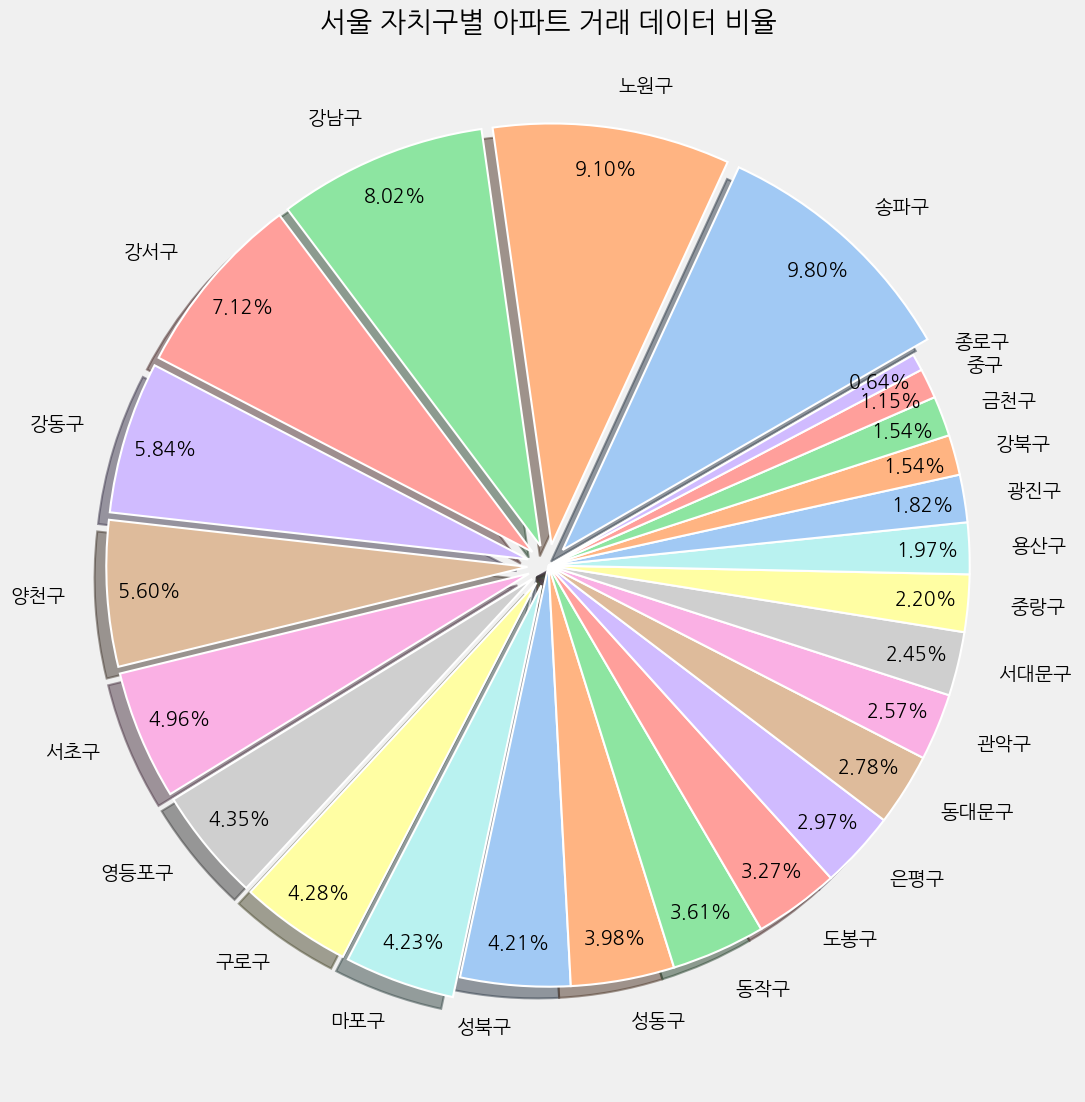

In [ ]:
plt.subplots(figsize=(15,13))

exp = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0)
wedgeprops = {
    'edgecolor': 'white',
    'linestyle': '-',
    'linewidth': 1.5
}

plt.pie(df_seoul_gu, labels=df_seoul_gu.index,  autopct='%.2f%%', pctdistance=0.90,  startangle = 30,
        explode=exp, colors=sns.color_palette('pastel'), wedgeprops=wedgeprops, shadow=True)
plt.title('서울 자치구별 아파트 거래 데이터 비율', size=20)

plt.show()

In [ ]:
df_seoul_gu_top10 = df["Region_Name"].value_counts()[:10]
df_seoul_gu_top10

송파구     116599
노원구     108253
강남구      95367
강서구      84717
강동구      69459
양천구      66568
서초구      58944
영등포구     51759
구로구      50896
마포구      50306
Name: Region_Name, dtype: int64

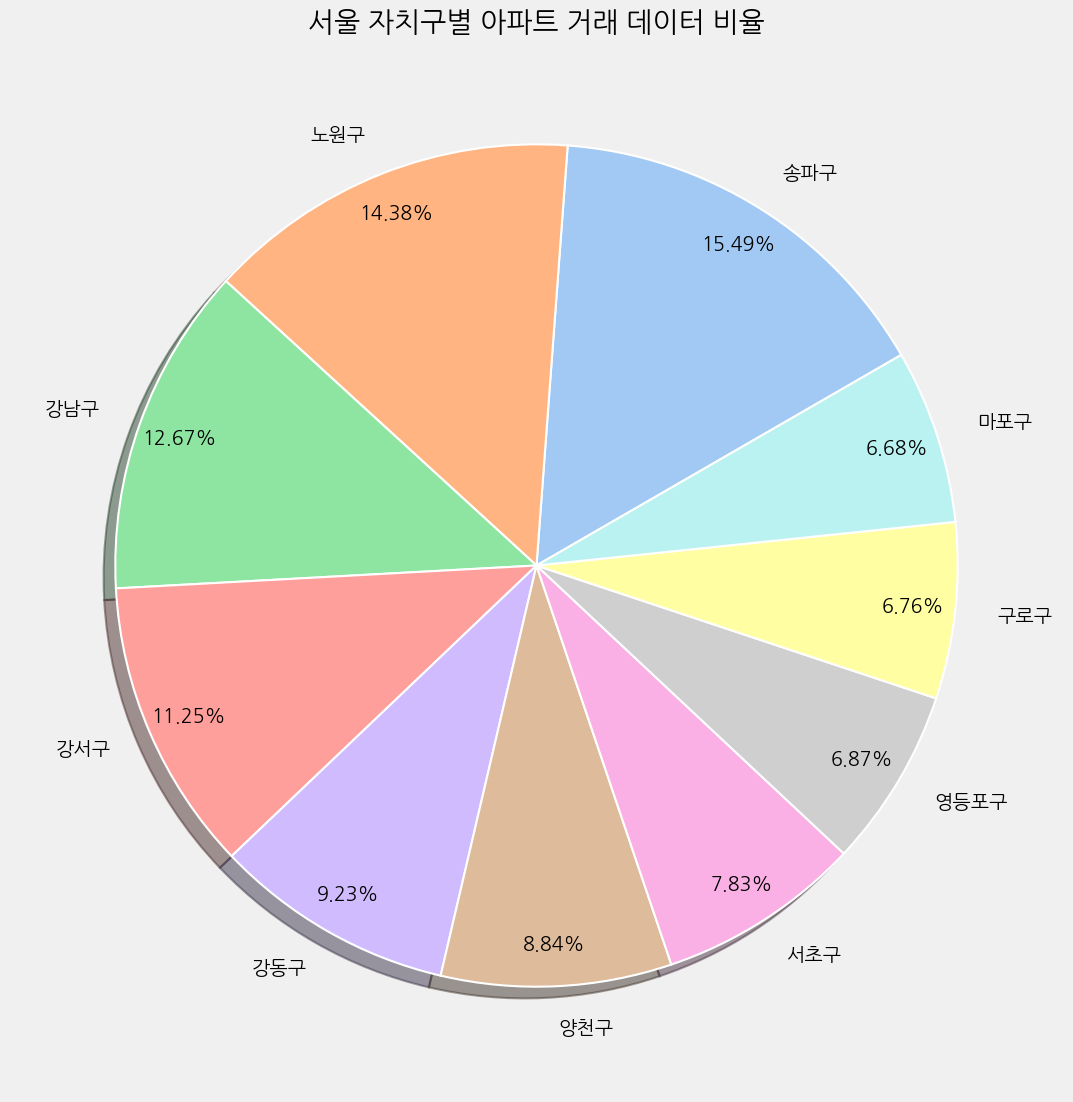

In [ ]:
plt.subplots(figsize=(15,13))

wedgeprops = {
    'edgecolor': 'white',
    'linestyle': '-',
    'linewidth': 1.5
}

plt.pie(df_seoul_gu_top10, labels=df_seoul_gu_top10.index,  autopct='%.2f%%', pctdistance=0.90,  startangle = 30,
        colors=sns.color_palette('pastel'), wedgeprops=wedgeprops, shadow=True)
plt.title('서울 자치구별 아파트 거래 데이터 비율', size=20)

plt.show()

## countplot

### 일변량 countplot

In [ ]:
df["Building_Use"].value_counts()

아파트      1053327
오피스텔       77081
연립다세대      59026
Name: Building_Use, dtype: int64

In [ ]:
year_count = df["Year"].value_counts().sort_index(ascending=True)
year_count

2011     96337
2012     89830
2013     89540
2014    105932
2015     94658
2016     92649
2017     96502
2018     96117
2019    102087
2020    115378
2021     90473
2022     56740
2023     63191
Name: Year, dtype: int64

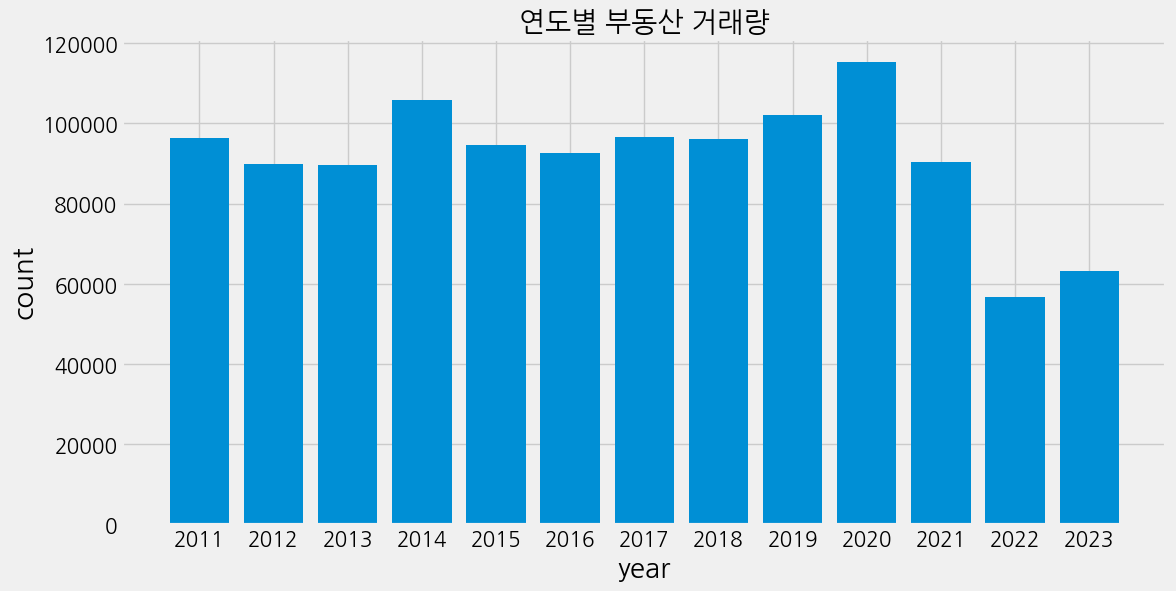

In [ ]:
# matplotlib을 이용하여 연도별 부동산 거래량을 나타내기

plt.figure(figsize = (12,6))
plt.bar(year_count.index.astype(str), year_count.values)
plt.title('연도별 부동산 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('year', size = 20)
plt.ylabel('count', size = 20)

plt.show()

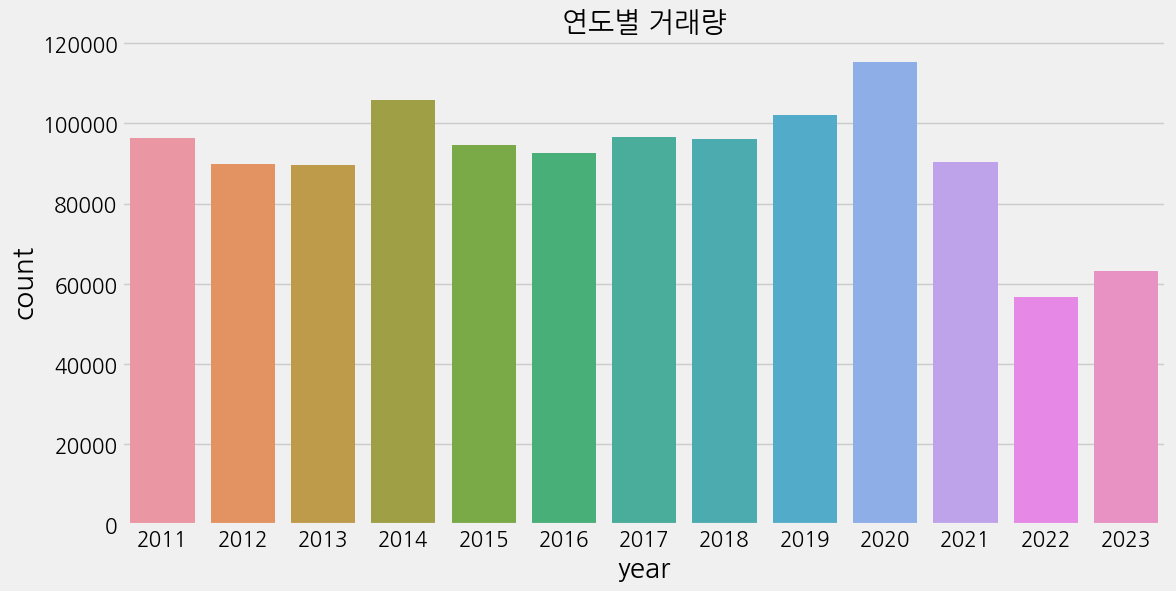

In [ ]:
# seaborn의 countplot을 이용하여 연도별 부동산 거래량을 나타내기

plt.figure(figsize=(12, 6))
sns.countplot(x = 'Year', data=df)
plt.title('연도별 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('year', size = 20)
plt.ylabel('count', size = 20)

plt.show()

In [ ]:
month_count = df["Month"].value_counts().sort_index(ascending=True)
month_count

1     103697
2     111884
3     120236
4      96940
5      99309
6     100691
7     103428
8      99466
9      84630
10     96629
11     81507
12     91017
Name: Month, dtype: int64

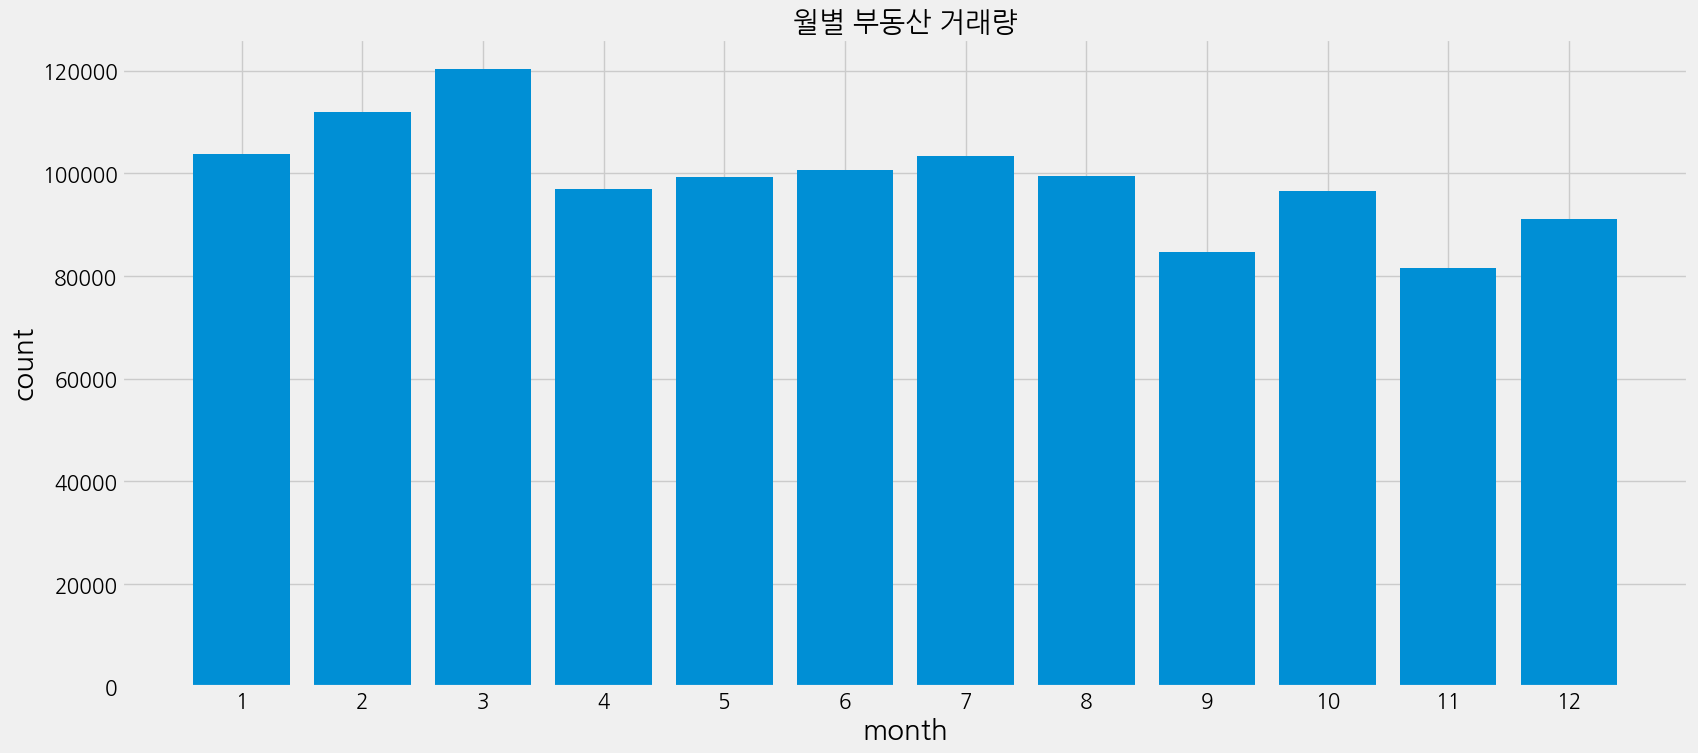

In [ ]:
# matplotlib을 이용하여 월별 부동산 거래량을 나타내기

plt.figure(figsize = (18,8))
plt.bar(month_count.index.astype(str), month_count.values)
plt.title('월별 부동산 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('month', size = 20)
plt.ylabel('count', size = 20)

plt.show()

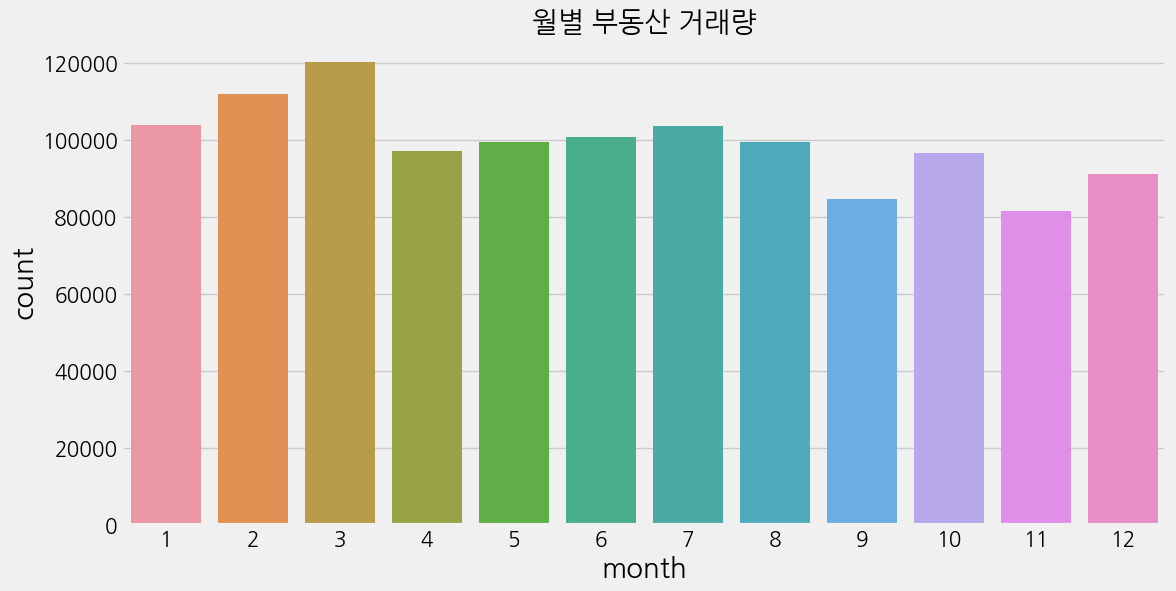

In [ ]:
# seaborn의 countplot을 이용하여 월별 부동산 거래량을 나타내기.

plt.figure(figsize=(12, 6))
sns.countplot(x = 'Month', data=df)
plt.title('월별 부동산 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('month', size = 20)
plt.ylabel('count', size = 20)

plt.show()

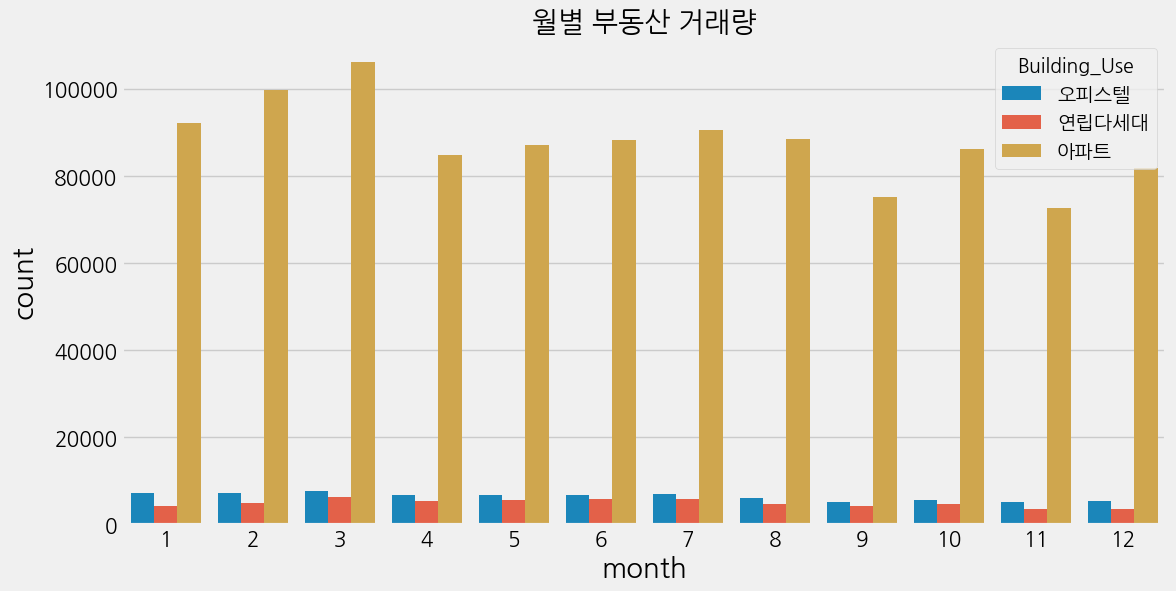

In [ ]:
# seaborn의 countplot을 이용하여 월별 부동산 거래량을 나타내기

plt.figure(figsize=(12, 6))
sns.countplot(x = 'Month', hue = 'Building_Use', data=df)
plt.title('월별 부동산 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('month', size = 20)
plt.ylabel('count', size = 20)

plt.show()

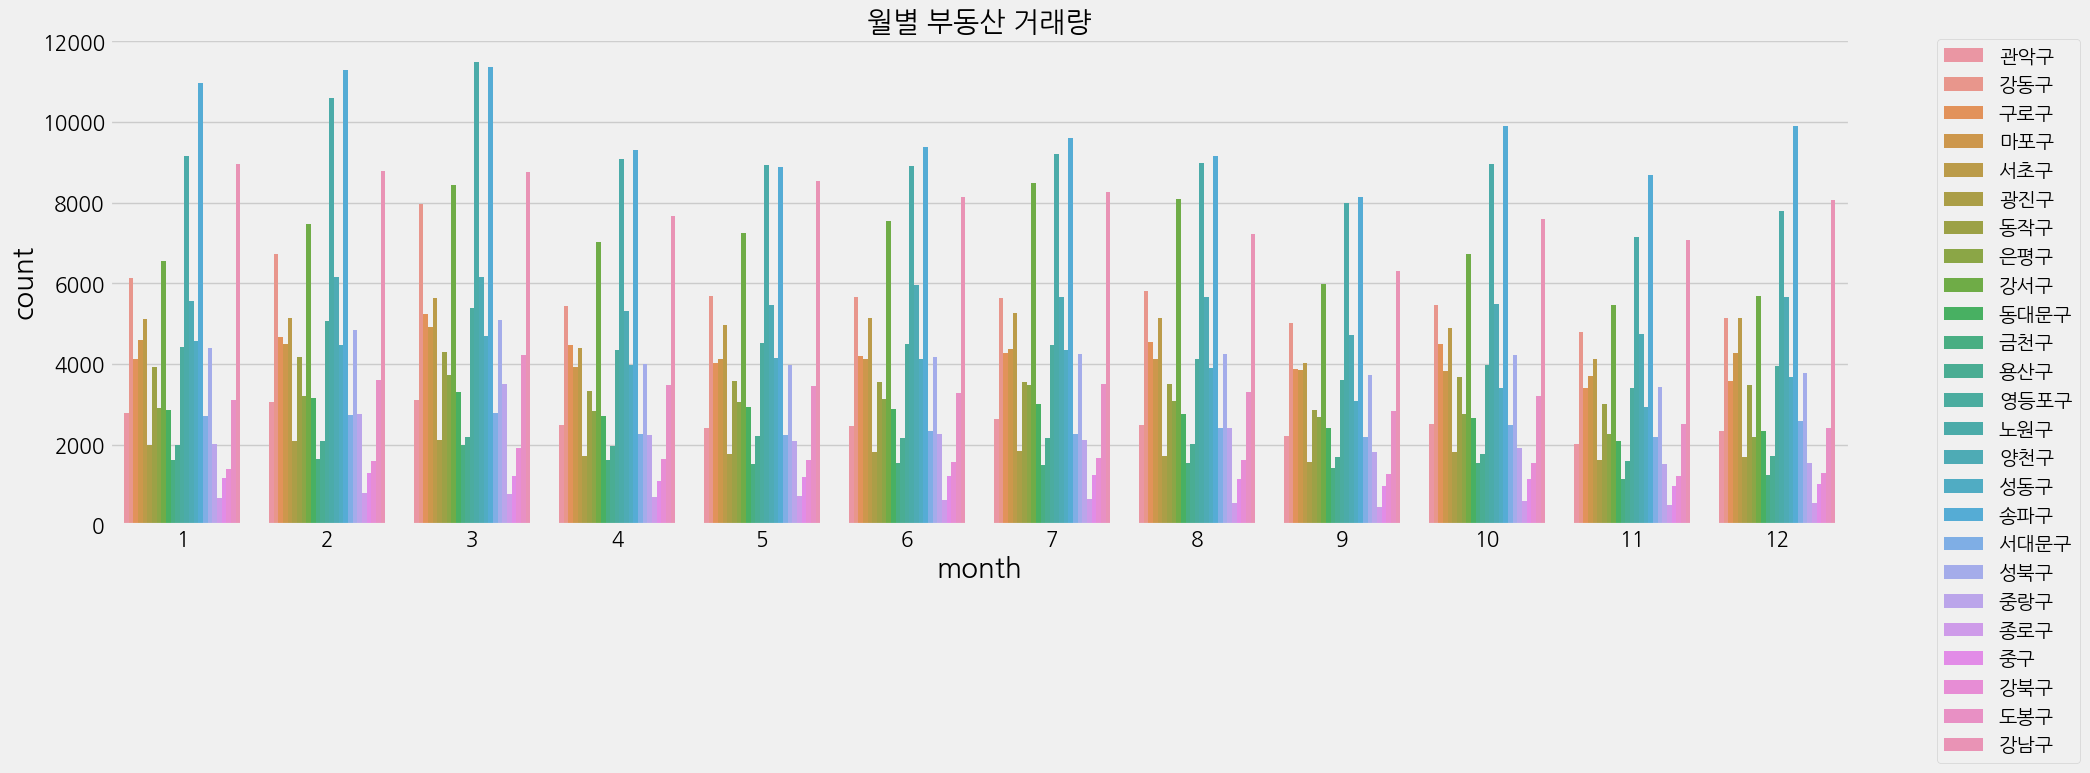

In [ ]:
# seaborn의 countplot을 이용하여 월별 부동산 거래량을 나타내봅시다.

plt.figure(figsize=(20, 6))
sns.countplot(x = 'Month', hue = 'Region_Name', data=df)
plt.title('월별 부동산 거래량', size = 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('month', size = 20)
plt.ylabel('count', size = 20)

plt.show()

### 이변량 countplot

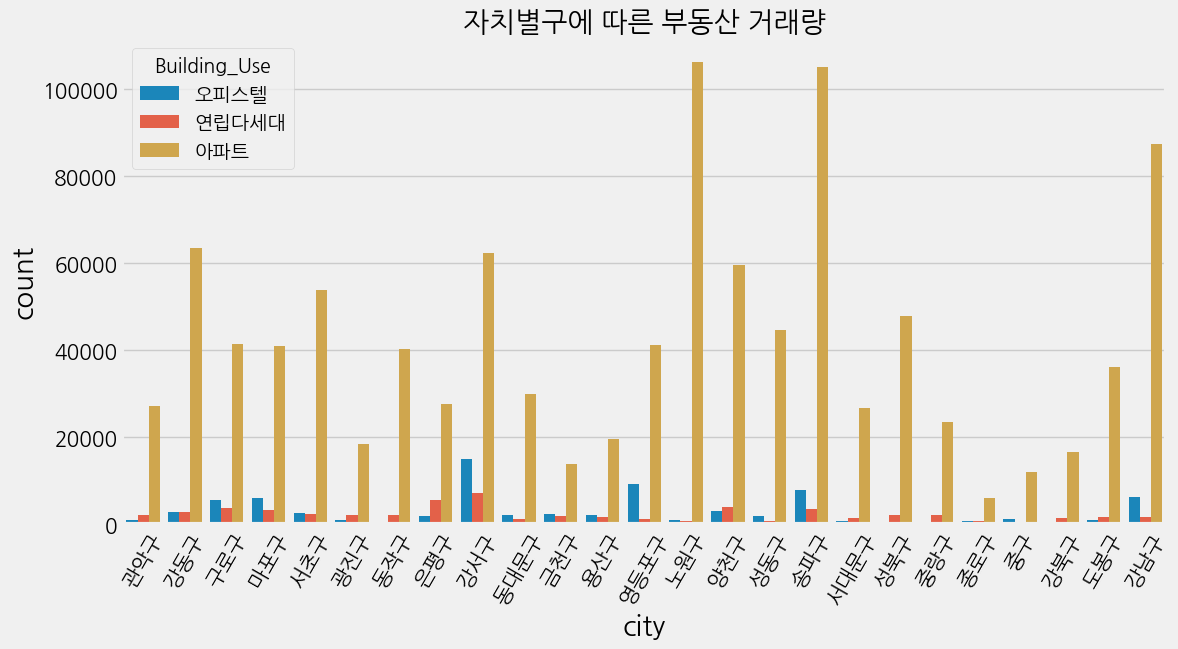

In [ ]:
# seaborn의 countplot을 이용하여 자치별구에 따른 부동산 거래량을 나타내기

plt.figure(figsize=(12, 6))
sns.countplot(x = 'Region_Name', hue = 'Building_Use' ,data=df)
plt.title('자치별구에 따른 부동산 거래량', size = 20)

plt.xticks(size = 15, rotation = 60)
plt.yticks(size = 15)

plt.xlabel('city', size = 20)
plt.ylabel('count', size = 20)
plt.show()

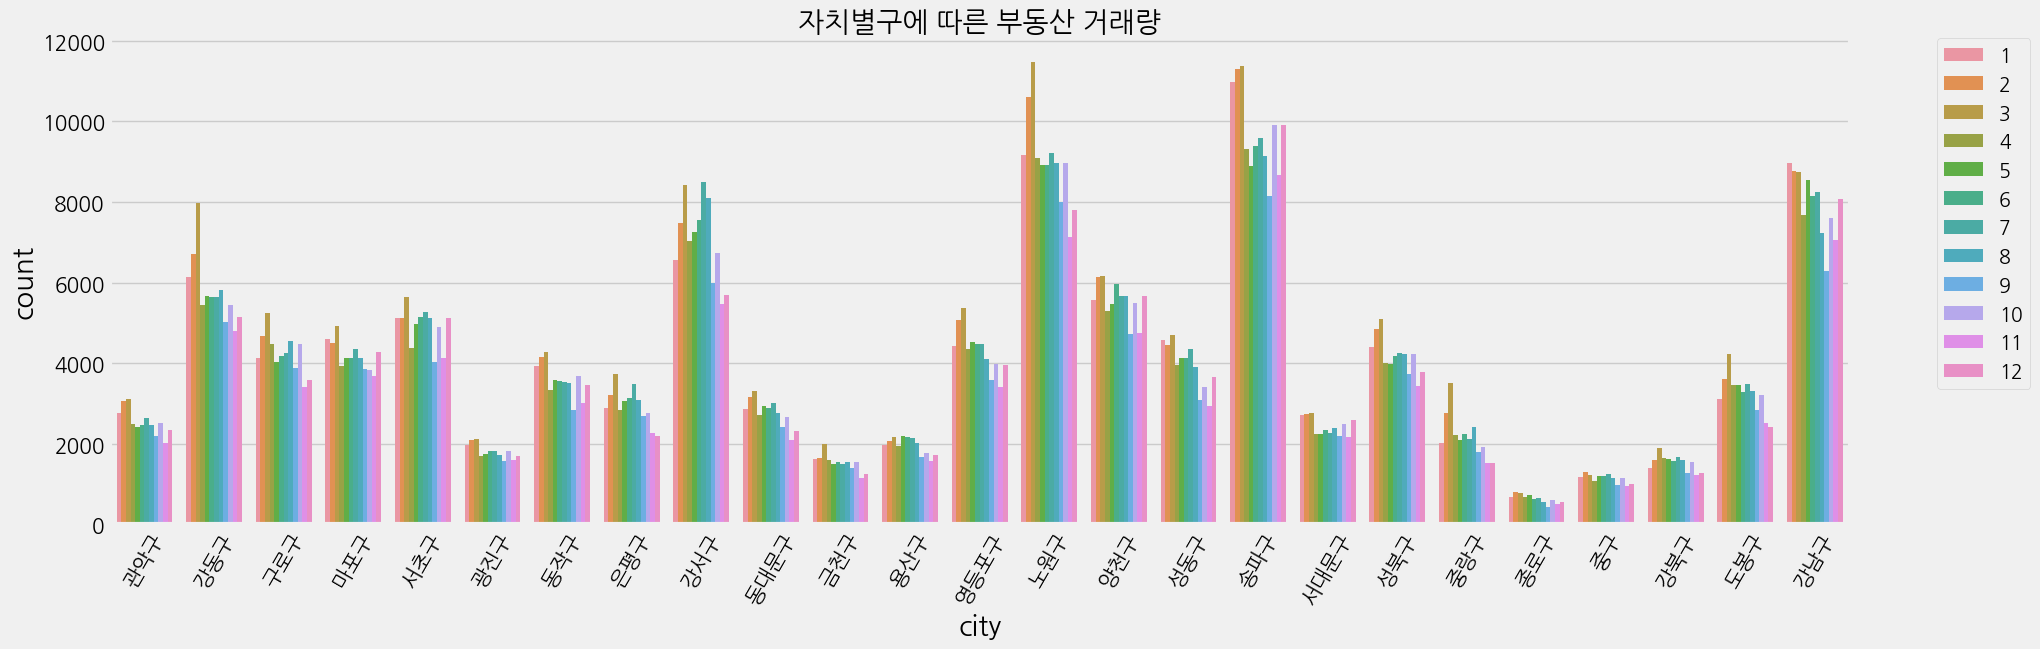

In [ ]:
# seaborn의 countplot을 이용하여 자치별구에 따른 부동산 거래량을 나타내기

plt.figure(figsize=(20, 6))
sns.countplot(x = 'Region_Name', hue = 'Month' ,data=df)
plt.title('자치별구에 따른 부동산 거래량', size = 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(size = 15, rotation = 60)
plt.yticks(size = 15)

plt.xlabel('city', size = 20)
plt.ylabel('count', size = 20)
plt.show()

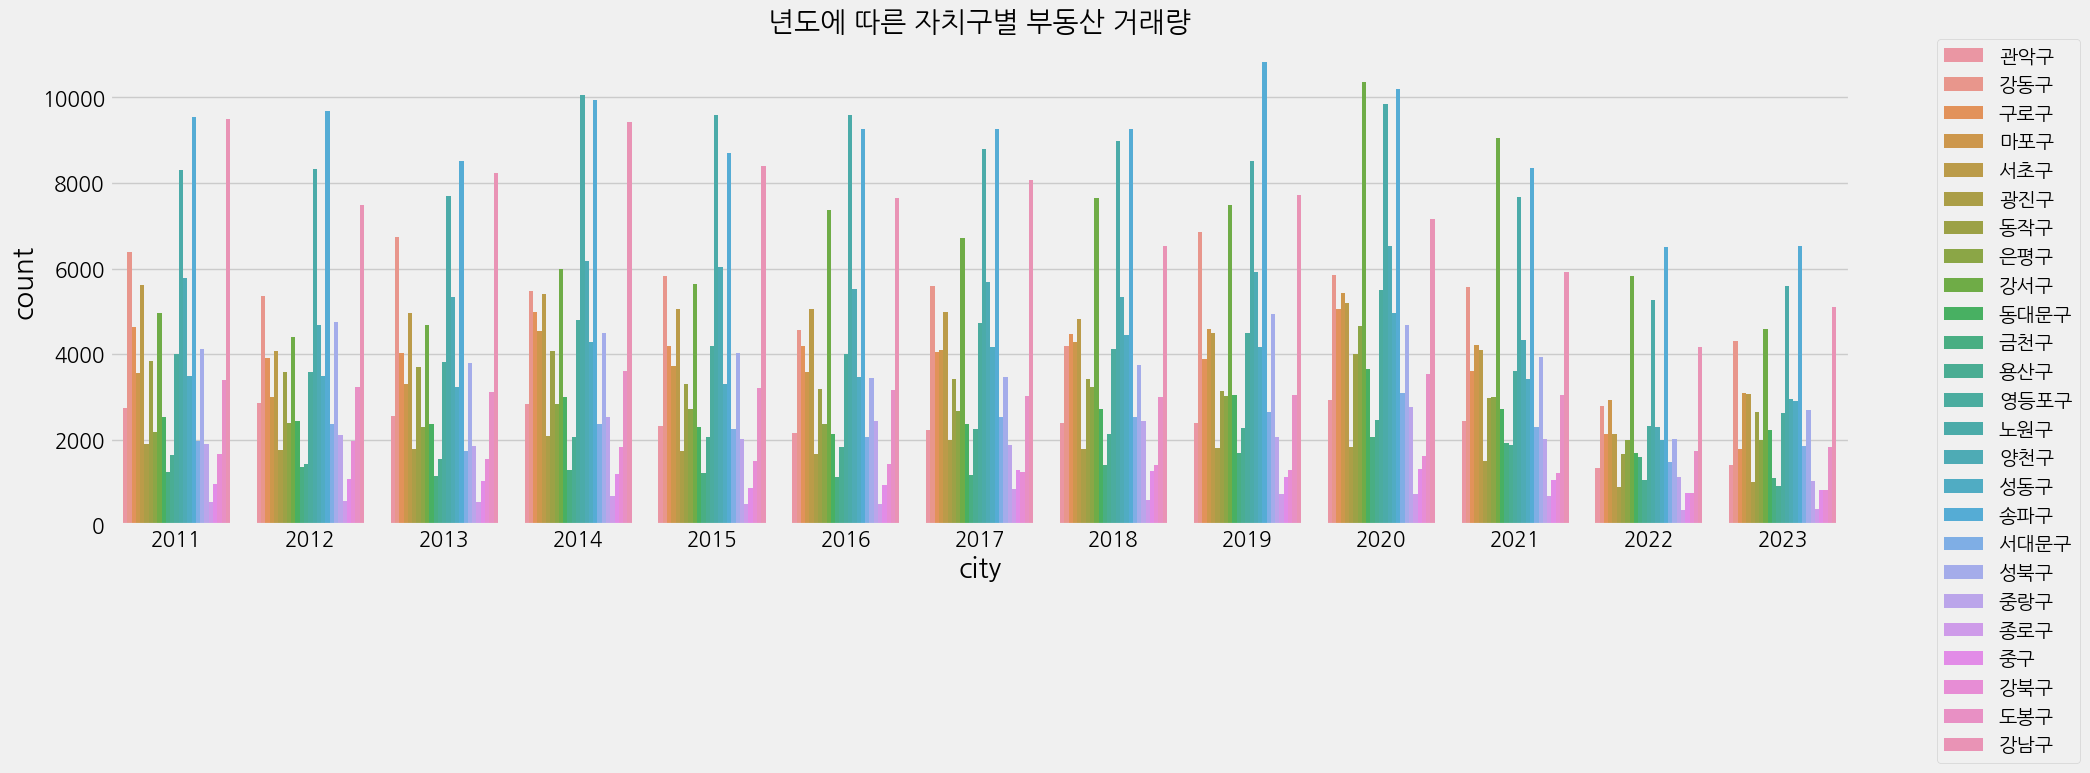

In [ ]:
# seaborn의 countplot을 이용하여 년도에 따른 자치구별 부동산 거래량을 나타내기

plt.figure(figsize=(20, 6))
sns.countplot(x = 'Year', hue = 'Region_Name' ,data=df)
plt.title('년도에 따른 자치구별 부동산 거래량', size = 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('city', size = 20)
plt.ylabel('count', size = 20)
plt.show()

## barplot

In [ ]:
price_seoul_gu_mean = df.groupby(['Region_Name'])[['JS_Price']].mean()#.sort_values(ascending = False)

In [ ]:
price_seoul_gu_mean

JS_Price
Region_Name              
강남구          55007.666719
강동구          33237.350854
강북구          26011.050941
강서구          27246.588560
관악구          30542.779187
광진구          42917.866575
구로구          26139.074859
금천구          23226.653050
노원구          21686.077633
도봉구          21330.818037
동대문구         32576.391745
동작구          41680.351729
마포구          38787.998430
서대문구         35917.703564
서초구          60508.708995
성동구          44818.668789
성북구          33223.716150
송파구          48634.416805
양천구          37649.075982
영등포구         34722.770281
용산구          47550.044931
은평구          29153.371859
종로구          42402.858419
중구           42014.551558
중랑구          24701.202952

In [ ]:
df["JS_Price"].mean()

37005.31997824175

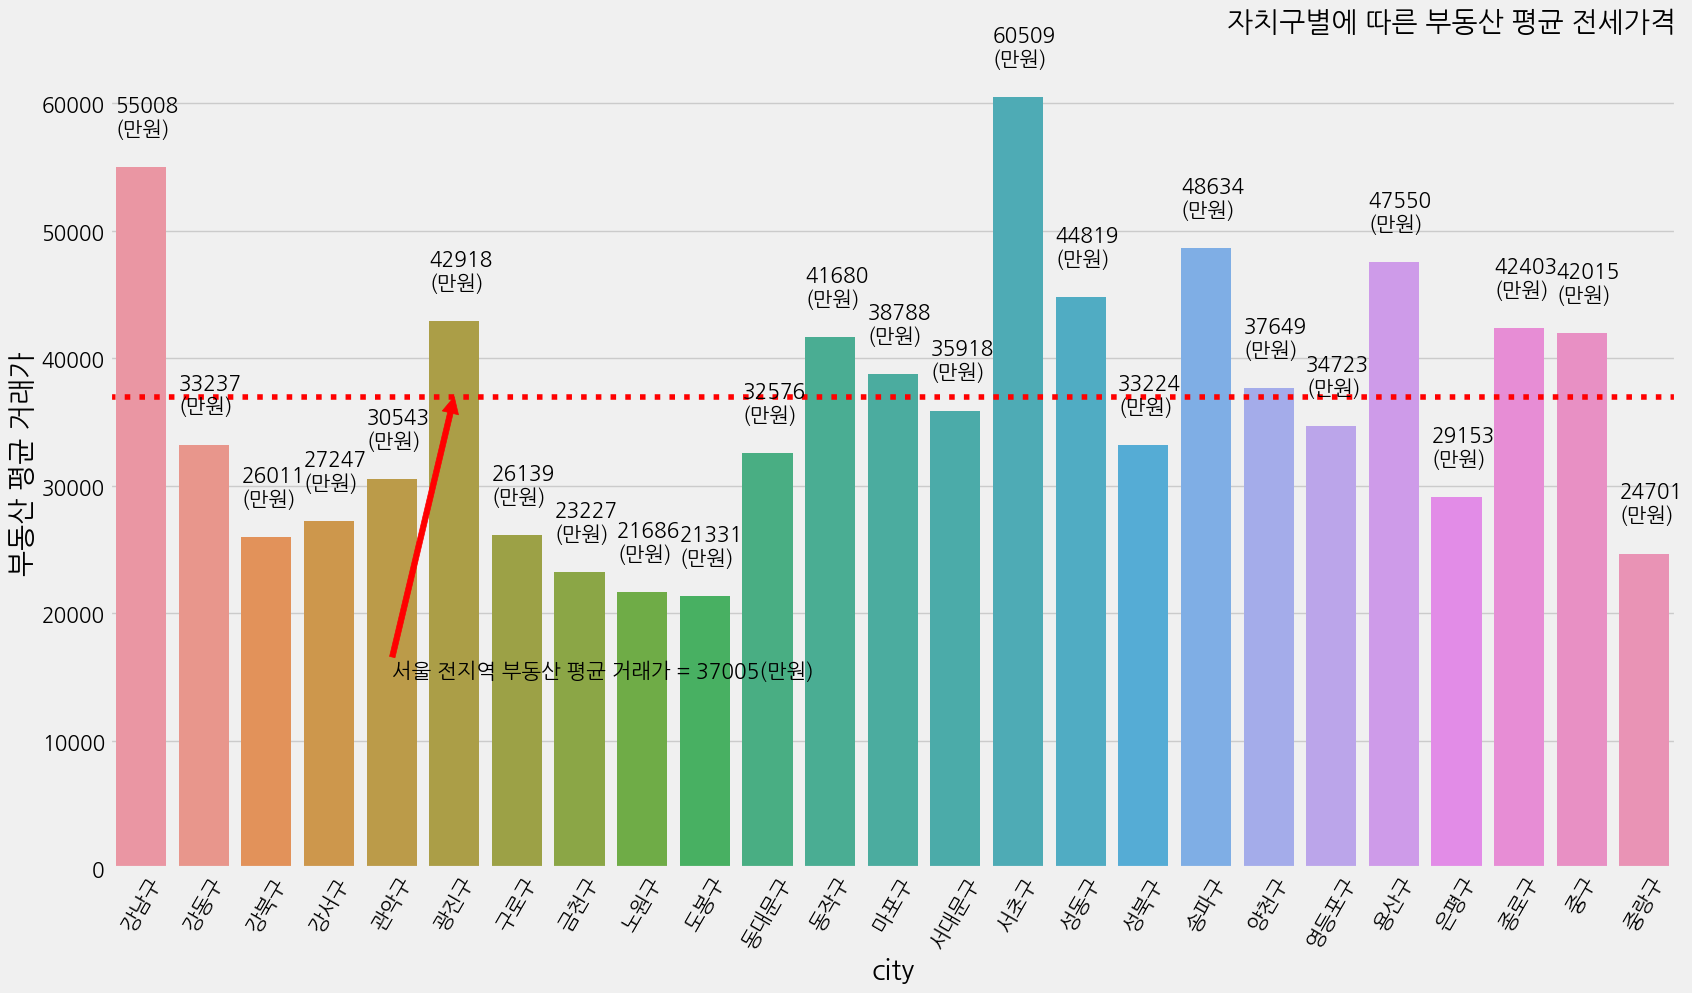

In [ ]:
# seaborn의 barplot을 이용하여 자치구별에 따른 부동산 평균 전세가격 나타내기

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18,10))
sns.barplot(x = price_seoul_gu_mean.index , y ='JS_Price', data = price_seoul_gu_mean)
# sns.barplot(x = price_seoul_gu_median.index , y ='JS_Price', data = price_seoul_gu_median)

plt.title('자치구별에 따른 부동산 평균 전세가격', size = 20, loc='right', pad=20)

plt.xticks(size = 15, rotation = 60)
plt.yticks(size = 15)

plt.xlabel('city', size = 20)
plt.ylabel('부동산 평균 거래가', size = 20)

plt.axhline(37005, color = 'red', linestyle=':')
plt.annotate('서울 전지역 부동산 평균 거래가 = 37005(만원)', xy =(5,37005), xytext=(4,15000), arrowprops={'color':'red'}, size = 15)



for i in range(len(price_seoul_gu_mean)):
  plt.text(x = range(len(price_seoul_gu_mean))[i]-0.4, y = price_seoul_gu_mean['JS_Price'][i]+2500, s =str(round(price_seoul_gu_mean['JS_Price'][i])) + '\n(만원)', size =15 )

plt.show()

In [ ]:
price_seoul_gu_median = df.groupby(['Region_Name'])[['JS_Price']].median()#.sort_values(ascending = False)

In [ ]:
price_seoul_gu_median

JS_Price
Region_Name          
강남구           45000.0
강동구           30000.0
강북구           25000.0
강서구           24000.0
관악구           29000.0
광진구           40000.0
구로구           24000.0
금천구           20500.0
노원구           19000.0
도봉구           19500.0
동대문구          30000.0
동작구           38000.0
마포구           35000.0
서대문구          33000.0
서초구           50000.0
성동구           41000.0
성북구           32000.0
송파구           44000.0
양천구           33000.0
영등포구          31000.0
용산구           41000.0
은평구           27000.0
종로구           37000.0
중구            40000.0
중랑구           23000.0

In [ ]:
df["JS_Price"].median()

31000.0

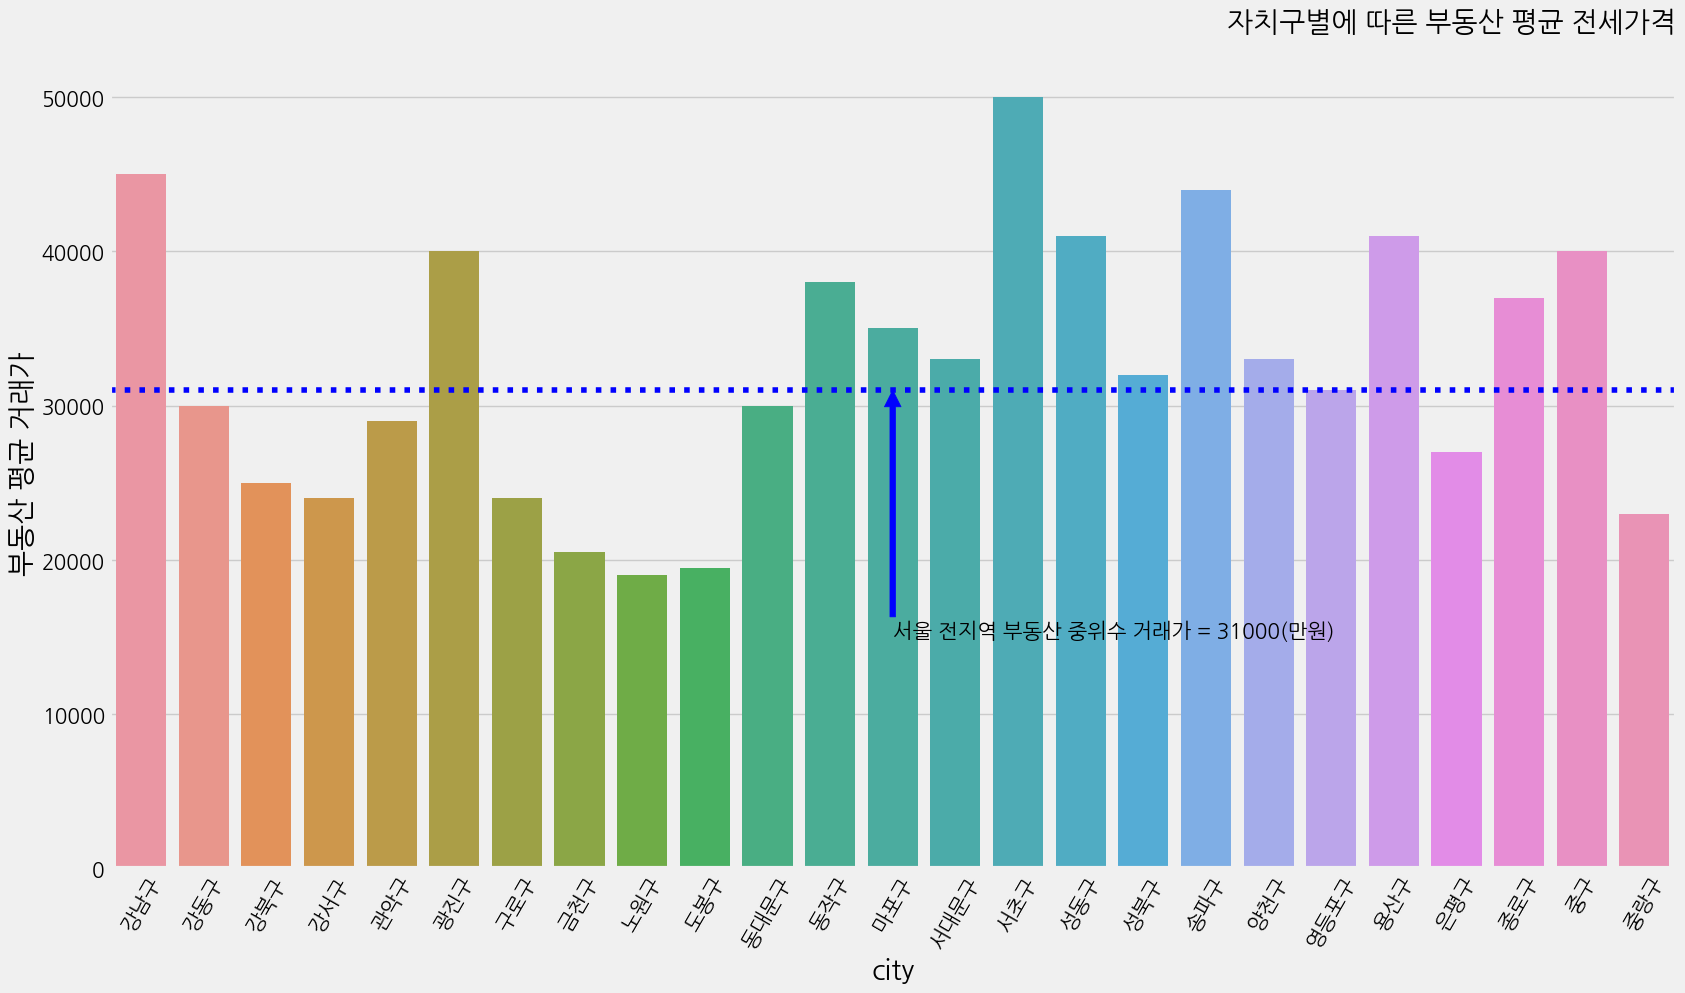

In [ ]:
# seaborn의 barplot을 이용하여 자치구별에 따른 부동산 평균 전세가격 나타내기

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18,10))
sns.barplot(x = price_seoul_gu_median.index , y ='JS_Price', data = price_seoul_gu_median)

plt.title('자치구별에 따른 부동산 평균 전세가격', size = 20, loc='right', pad=20)

plt.xticks(size = 15, rotation = 60)
plt.yticks(size = 15)

plt.xlabel('city', size = 20)
plt.ylabel('부동산 평균 거래가', size = 20)

plt.axhline(31000, color = 'blue', linestyle=':')
plt.annotate('서울 전지역 부동산 중위수 거래가 = 31000(만원)', xy =(12,31000), xytext=(12,15000), arrowprops={'color':'blue'}, size = 15)

plt.show()

In [ ]:
price_seoul_gu_re = df.groupby(['Region_Name'])[['JS_Price']].agg(['mean', 'median'])#.sort_values(ascending = False)

In [ ]:
price_seoul_gu_re

JS_Price         
                     mean   median
Region_Name                       
강남구          55007.666719  45000.0
강동구          33237.350854  30000.0
강북구          26011.050941  25000.0
강서구          27246.588560  24000.0
관악구          30542.779187  29000.0
광진구          42917.866575  40000.0
구로구          26139.074859  24000.0
금천구          23226.653050  20500.0
노원구          21686.077633  19000.0
도봉구          21330.818037  19500.0
동대문구         32576.391745  30000.0
동작구          41680.351729  38000.0
마포구          38787.998430  35000.0
서대문구         35917.703564  33000.0
서초구          60508.708995  50000.0
성동구          44818.668789  41000.0
성북구          33223.716150  32000.0
송파구          48634.416805  44000.0
양천구          37649.075982  33000.0
영등포구         34722.770281  31000.0
용산구          47550.044931  41000.0
은평구          29153.371859  27000.0
종로구          42402.858419  37000.0
중구           42014.551558  40000.0
중랑구          24701.202952  23000.0

In [ ]:
type(price_seoul_gu_re)

pandas.core.frame.DataFrame

<Figure size 15000x10000 with 0 Axes>

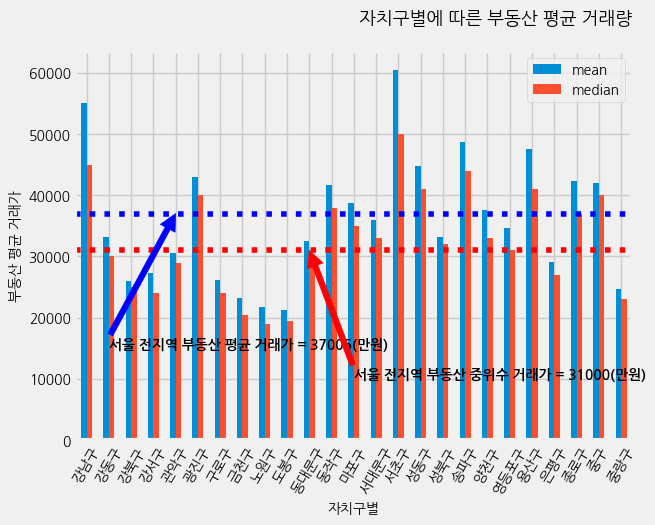

In [ ]:
plt.figure(figsize = (150,100))
price_seoul_gu_re.plot(kind='bar')
plt.title('자치구별에 따른 부동산 평균 거래량', size = 13, loc='right', pad=20)

plt.xticks(size = 10, rotation = 60)
plt.yticks(size = 10)

plt.xlabel('자치구별', size = 10)
plt.ylabel('부동산 평균 거래가', size = 10)

plt.legend(['mean', 'median'], fontsize=10)

plt.axhline(37005, color = 'blue', linestyle=':')
plt.annotate('서울 전지역 부동산 평균 거래가 = 37005(만원)', xy =(4,37005), xytext=(1,15000), arrowprops={'color':'blue'}, weight='bold', size = 10)
plt.axhline(31000, color = 'red', linestyle=':')
plt.annotate('서울 전지역 부동산 중위수 거래가 = 31000(만원)', xy =(10,31000), xytext=(12,10000), arrowprops={'color':'red'}, weight='bold', size = 10)

plt.show()

**서울특별시 아파트 평균 거래가 top10 지역**

In [ ]:
price_seoul_gu = df.groupby(['Region_Name'])[['JS_Price']].mean()
price_seoul_gu_top_10 = price_seoul_gu.sort_values(['JS_Price'], ascending = False)[:10]

In [ ]:
price_seoul_gu_top_10

JS_Price
Region_Name              
서초구          60508.708995
강남구          55007.666719
송파구          48634.416805
용산구          47550.044931
성동구          44818.668789
광진구          42917.866575
종로구          42402.858419
중구           42014.551558
동작구          41680.351729
마포구          38787.998430

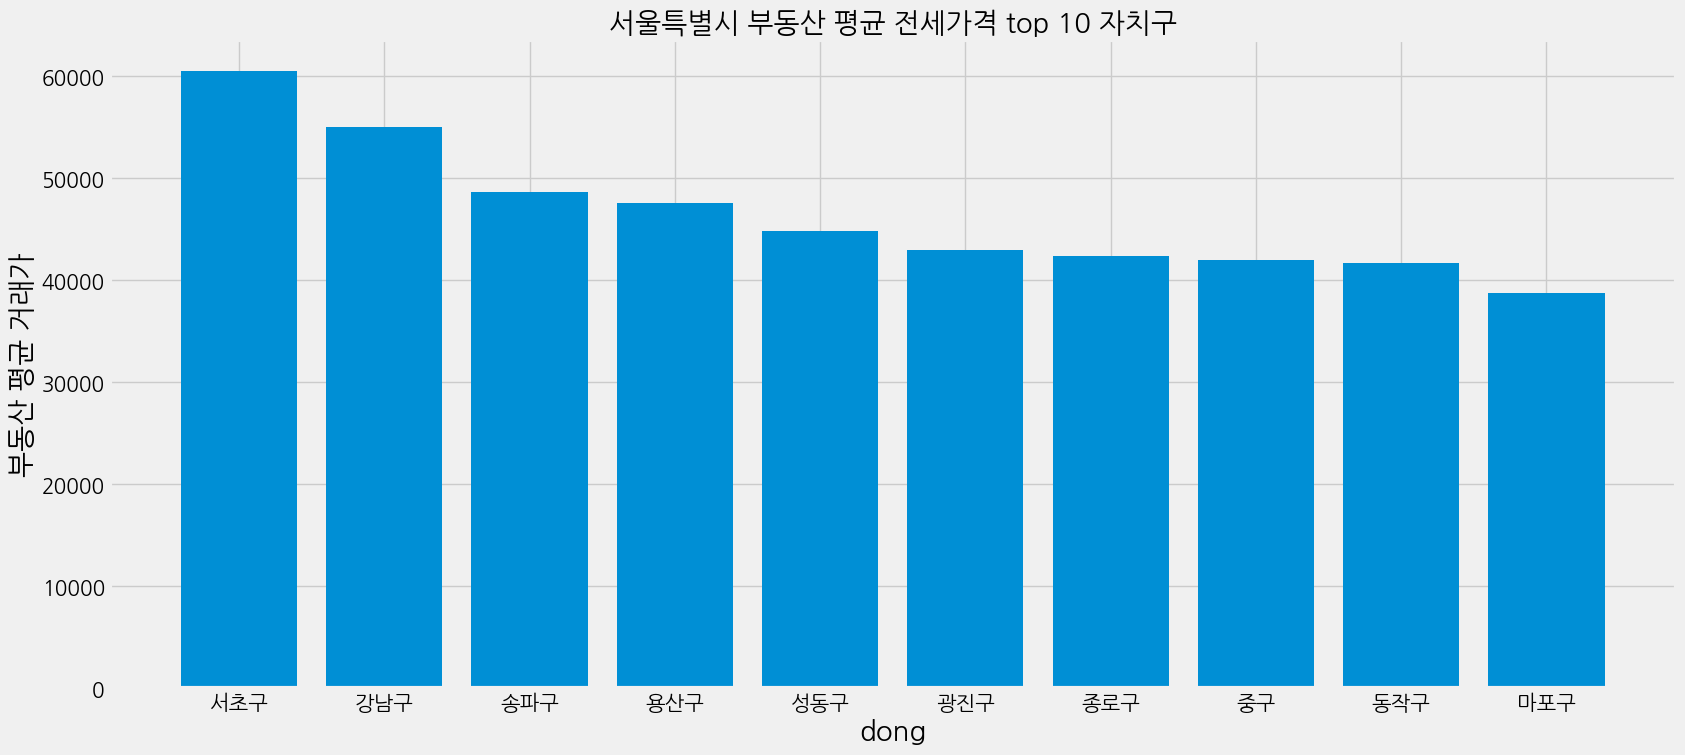

In [ ]:
# matplotlib의 bar을 이용하여 평균거래가가 높은 10개의 자치구별 평균 전세가격을 나타내기
plt.subplots(figsize = (18,8))
plt.bar(price_seoul_gu_top_10.index, price_seoul_gu_top_10['JS_Price'])
plt.title('서울특별시 부동산 평균 전세가격 top 10 자치구', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('dong', size = 20)
plt.ylabel('부동산 평균 거래가', size = 20)

plt.show()

In [ ]:
price_seoul_gu_top_10['JS_Price'].sort_values()

Region_Name
마포구    38787.998430
동작구    41680.351729
중구     42014.551558
종로구    42402.858419
광진구    42917.866575
성동구    44818.668789
용산구    47550.044931
송파구    48634.416805
강남구    55007.666719
서초구    60508.708995
Name: JS_Price, dtype: float64

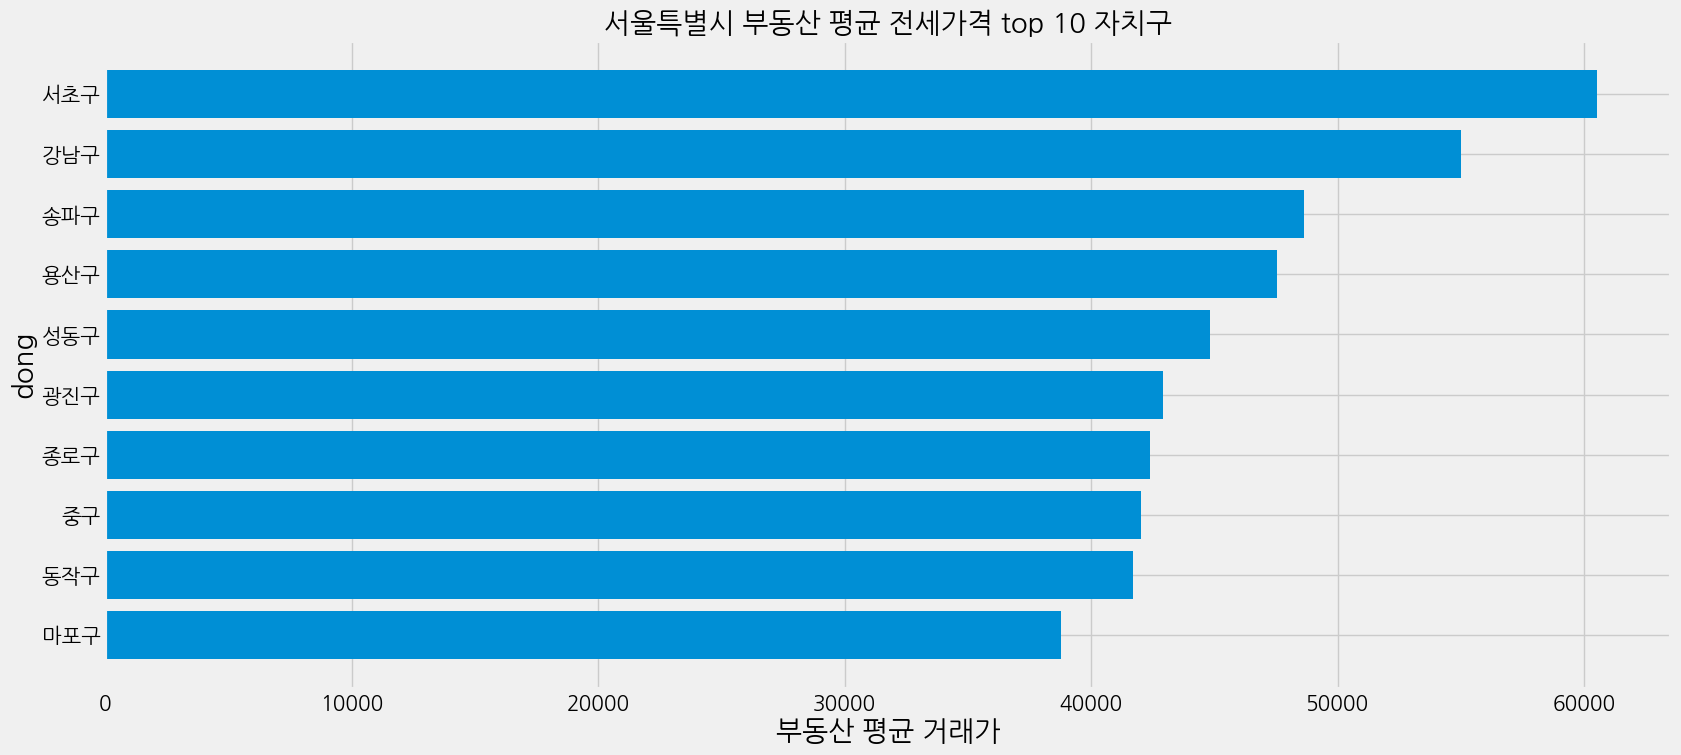

In [ ]:
# matplotlib의 barh을 이용하여 평균거래가가 높은 10개의 자치구별 평균 전세가격을 가로로 나타내기

plt.subplots(figsize = (18,8))
plt.barh(price_seoul_gu_top_10['JS_Price'].sort_values().index, price_seoul_gu_top_10['JS_Price'].sort_values())
plt.title('서울특별시 부동산 평균 전세가격 top 10 자치구', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('부동산 평균 거래가', size = 20)
plt.ylabel('dong', size = 20)
plt.show()

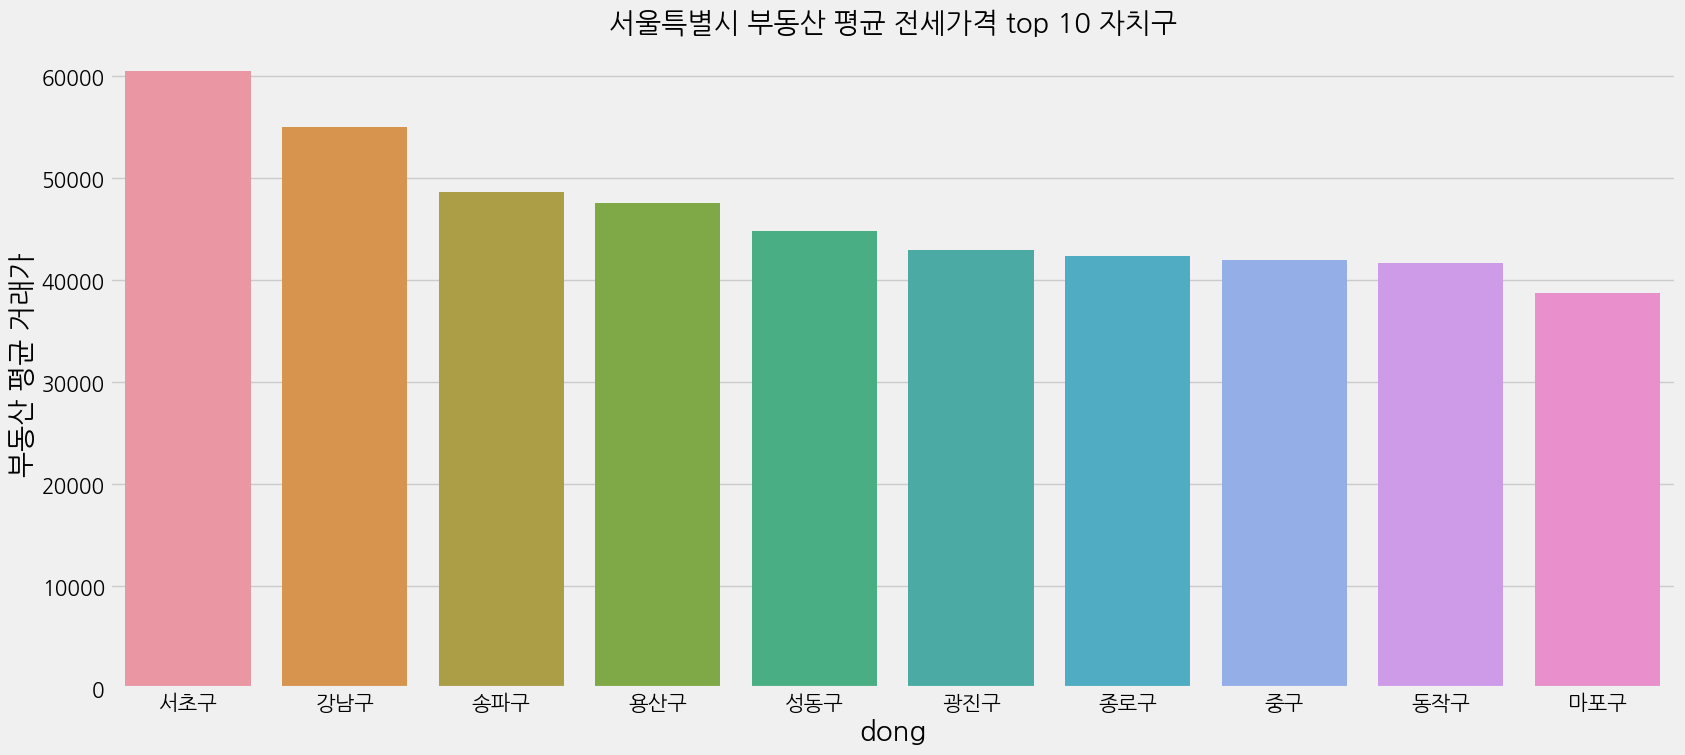

In [ ]:
# seaborn의 barplot을 이용하여 서울특별시 부동산 평균 전세가격 top 10 자치구 나타내기

plt.subplots(figsize = (18,8))
sns.barplot(x = price_seoul_gu_top_10.index, y ='JS_Price', data = price_seoul_gu_top_10)
plt.title('서울특별시 부동산 평균 전세가격 top 10 자치구', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('dong', size = 20)
plt.ylabel('부동산 평균 거래가', size = 20)

plt.show()

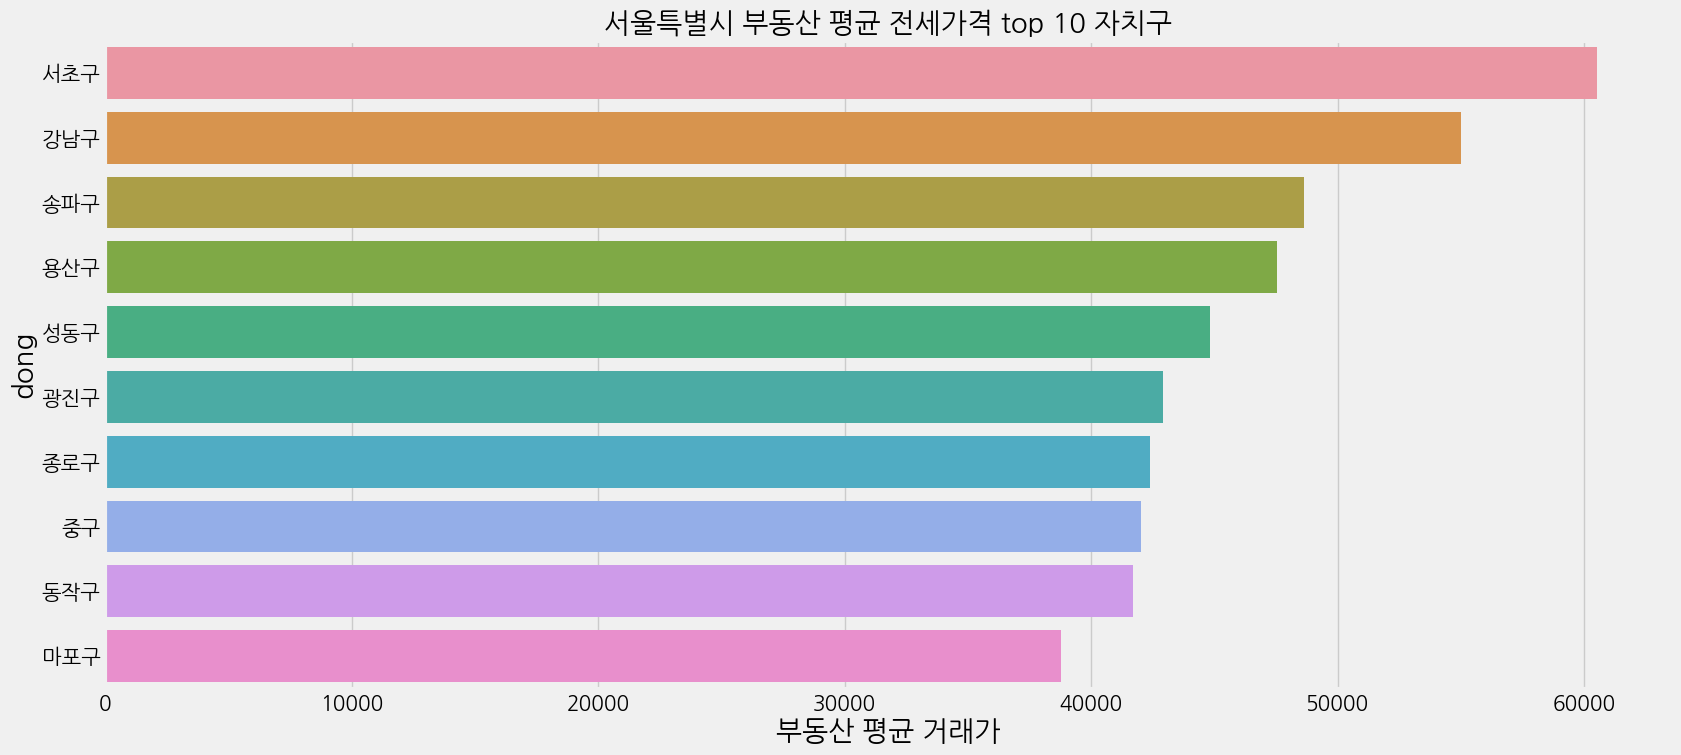

In [ ]:
# seaborn의 barplot을 이용하여 서울특별시 부동산 평균 전세가격 top 10 자치구 가로로 나타내기

plt.subplots(figsize = (18,8))
sns.barplot(x ='JS_Price', y = price_seoul_gu_top_10.index, orient='h', data = price_seoul_gu_top_10)
plt.title('서울특별시 부동산 평균 전세가격 top 10 자치구', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('부동산 평균 거래가', size = 20)
plt.ylabel('dong', size = 20)
plt.show()

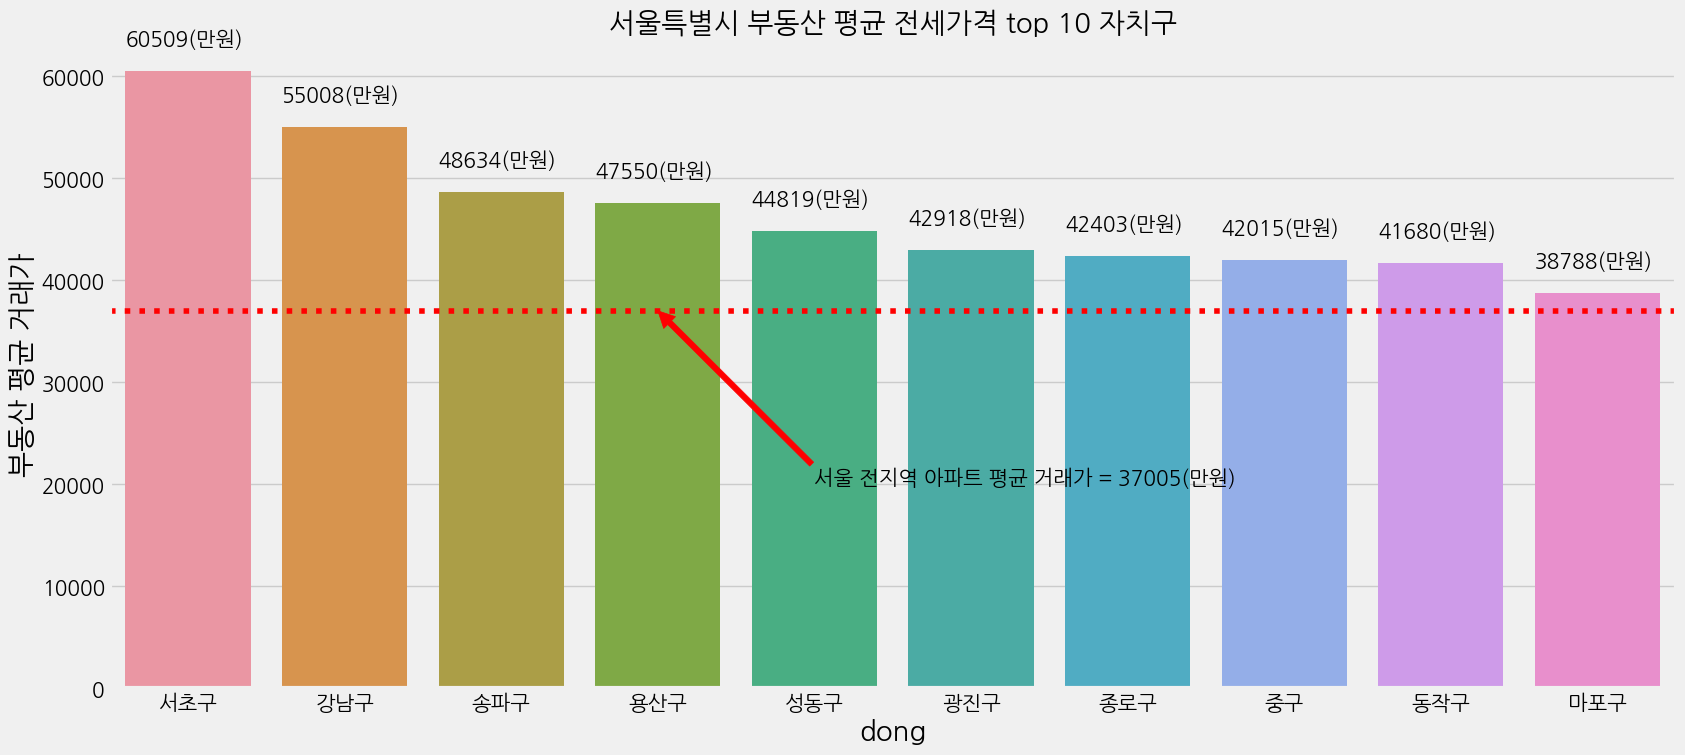

In [ ]:
# seaborn의 barplot을 이용하여 서울특별시 부동산 평균 전세가격 top 10 자치구 나타내기.

plt.subplots(figsize = (18,8))
sns.barplot(x = price_seoul_gu_top_10.index, y ='JS_Price', data = price_seoul_gu_top_10)
plt.title('서울특별시 부동산 평균 전세가격 top 10 자치구', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('dong', size = 20)
plt.ylabel('부동산 평균 거래가', size = 20)

plt.axhline(37005, color = 'red', linestyle=':')
plt.annotate('서울 전지역 아파트 평균 거래가 = 37005(만원)', xy =(3,37005), xytext=(4,20000), arrowprops={'color':'red'}, size = 15)

for i in range(len(price_seoul_gu_top_10)):
  plt.text(x = range(len(price_seoul_gu_top_10))[i]-0.4, y = price_seoul_gu_top_10['JS_Price'][i]+2500, s =str(round(price_seoul_gu_top_10['JS_Price'][i])) + '(만원)', size =15 )

plt.show()

## 히스토그램

### 일변량 히스토그램

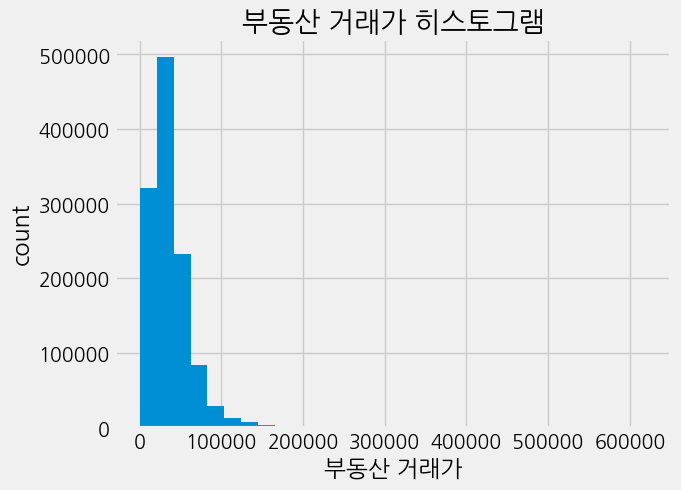

In [ ]:
# matplotlib으로 히스토그램을 그려보기

plt.hist(df['JS_Price'], bins = 30)
plt.title('부동산 거래가 히스토그램', size = 20)

plt.xlabel('부동산 거래가')
plt.ylabel('count')
plt.show()

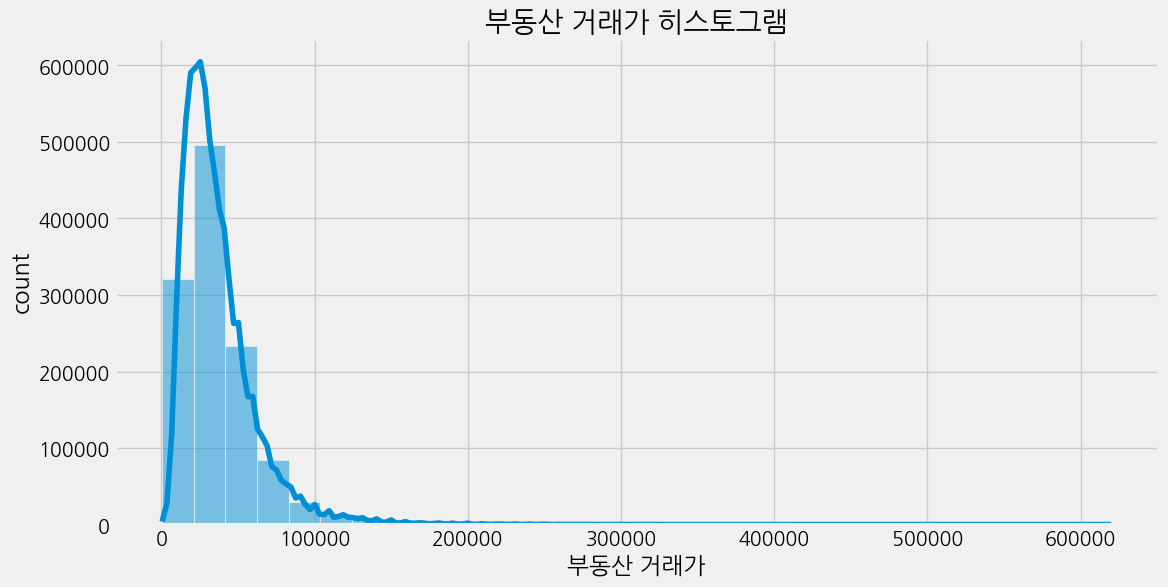

In [ ]:
# seaborn으로 히스토그램을 그려보기

plt.subplots(figsize=(12, 6))
sns.histplot(x='JS_Price', data=df, kde=True, bins=30)
plt.title('부동산 거래가 히스토그램', size = 20)

plt.xlabel('부동산 거래가')
plt.ylabel('count')
plt.show()

### 이변량 히스토그램


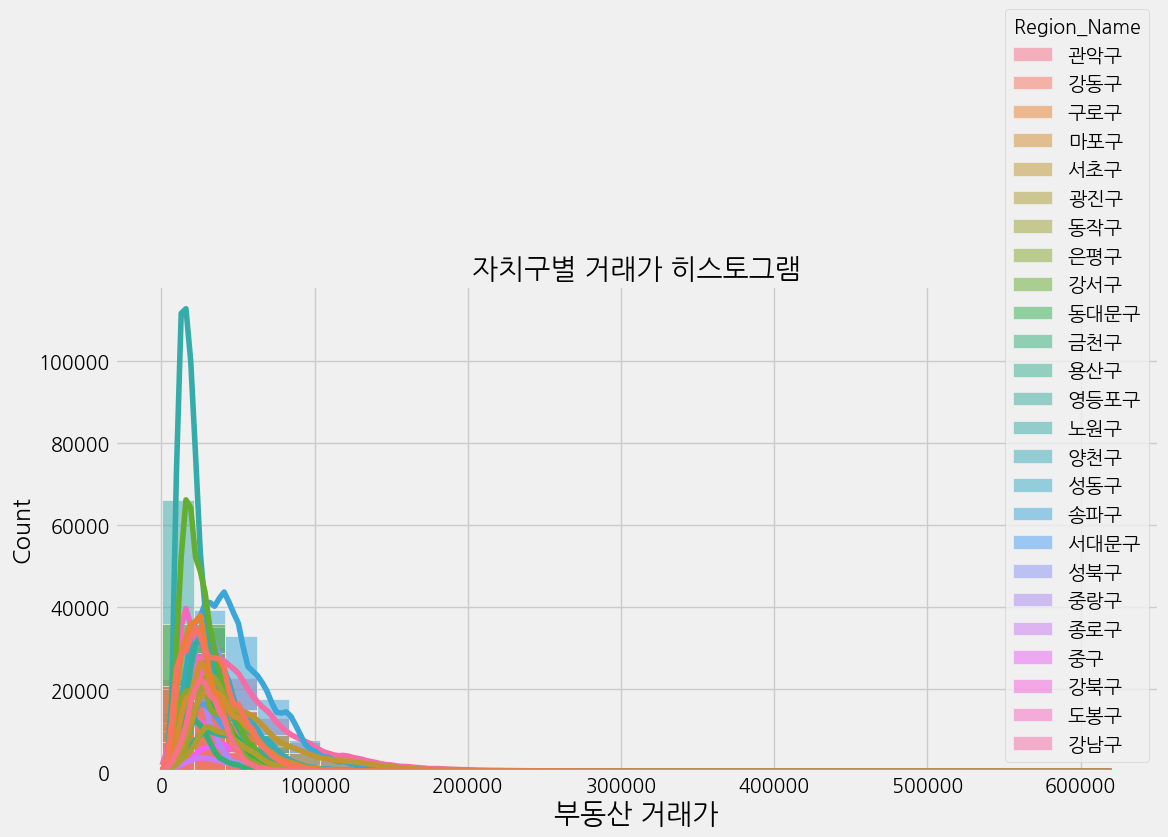

In [ ]:
# matplotlib으로 히스토그램을 그려보기
plt.subplots(figsize=(12, 6))
sns.histplot(x='JS_Price', data=df, kde=True, hue = 'Region_Name', bins=30)
plt.title('자치구별 거래가 히스토그램', size = 20)
plt.xlabel('부동산 거래가', size = 20)
plt.show()

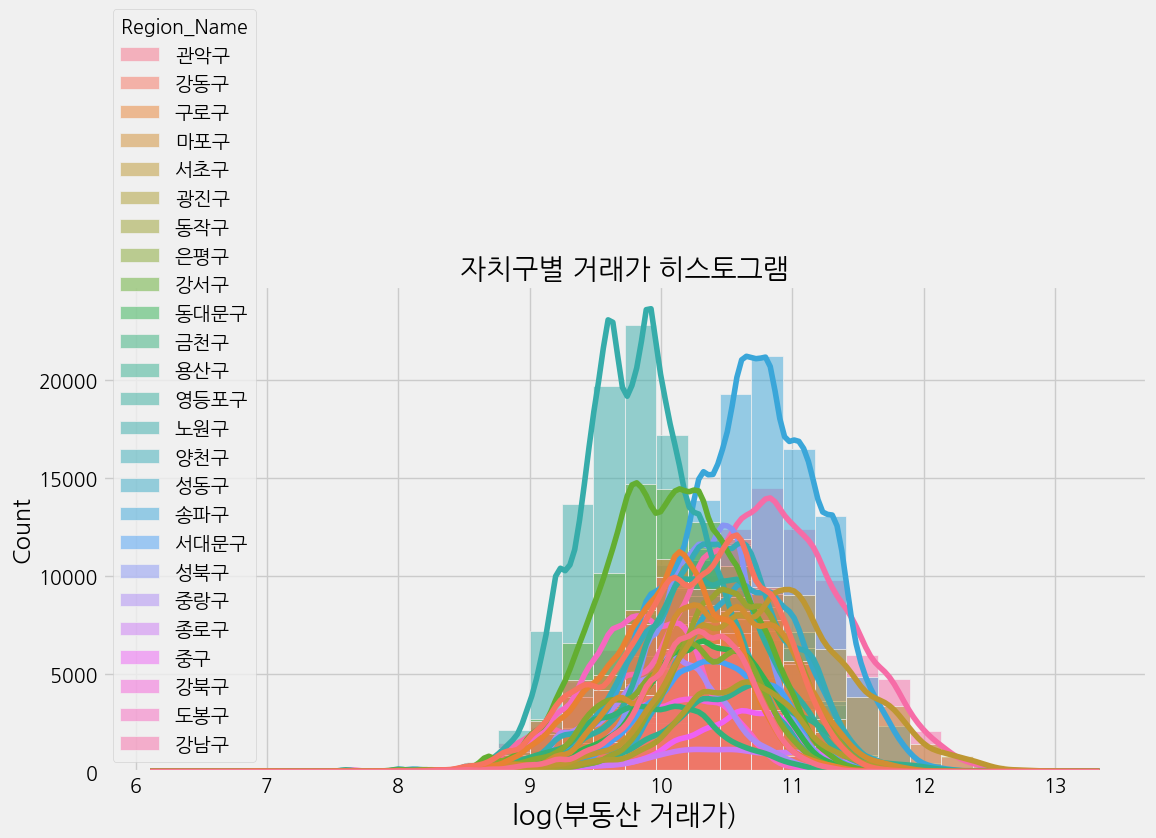

In [ ]:
# 보다 명확한 차이를 확인하기 위해 로그를 취해서 비교해보기

plt.subplots(figsize=(12, 6))
sns.histplot(x= np.log1p(df['JS_Price']), data=df, kde=True, hue = 'Region_Name',bins=30)
plt.title('자치구별 거래가 히스토그램', size = 20)

plt.xlabel('log(부동산 거래가)', size = 20)
plt.show()

## boxplot

### 일변량 boxplot

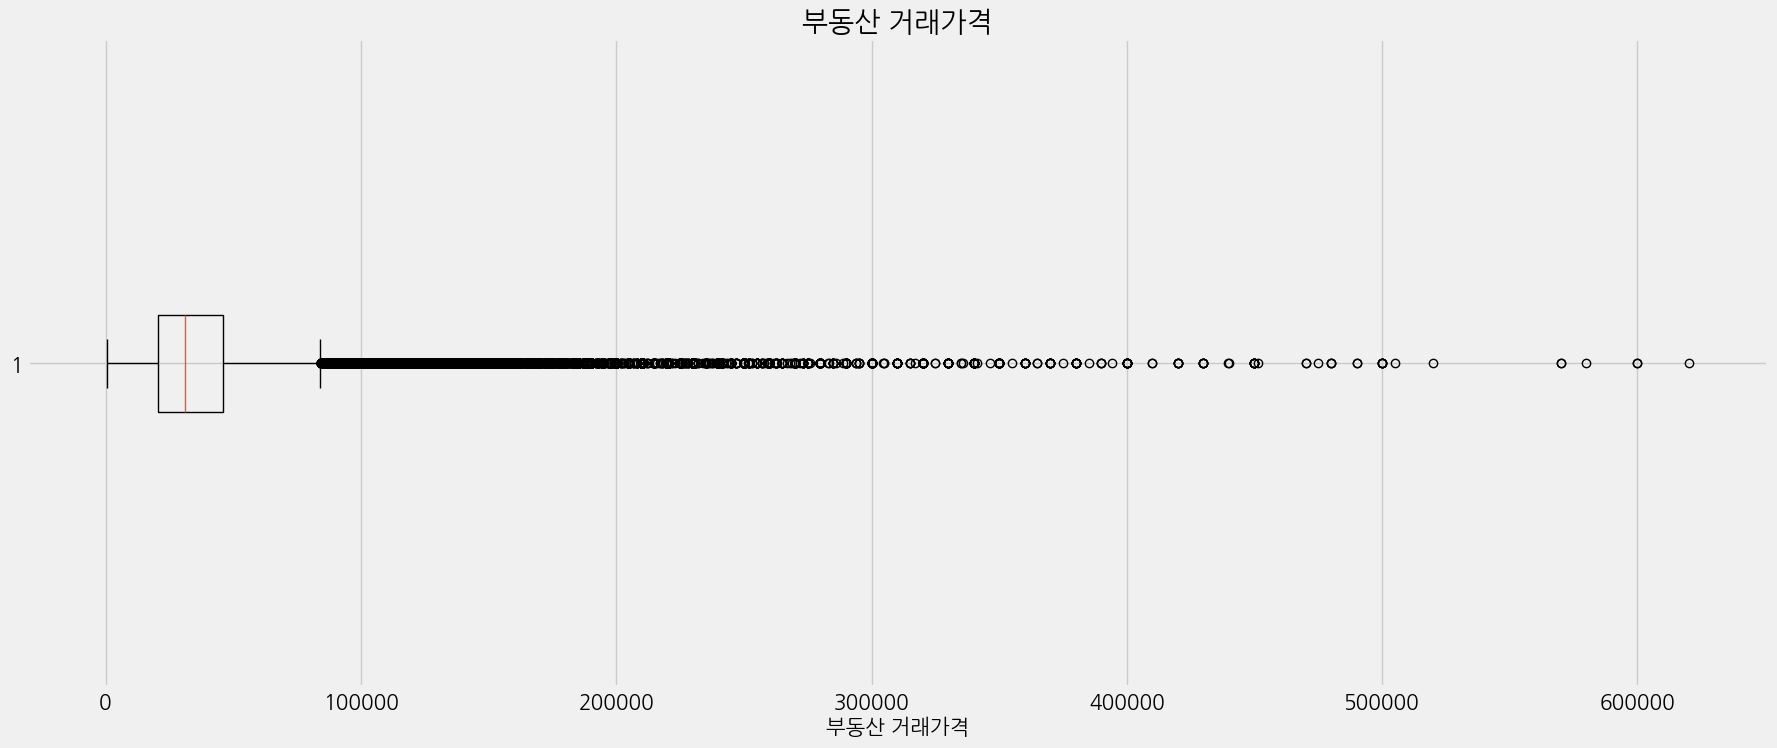

In [ ]:
# plt의 boxplot을 통해 부동산 거래가의 이상치를 확인해보기
plt.subplots(figsize = (20,8))
plt.boxplot(df['JS_Price'], vert=False)
plt.title('부동산 거래가격', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('부동산 거래가격', size = 15)
plt.show()

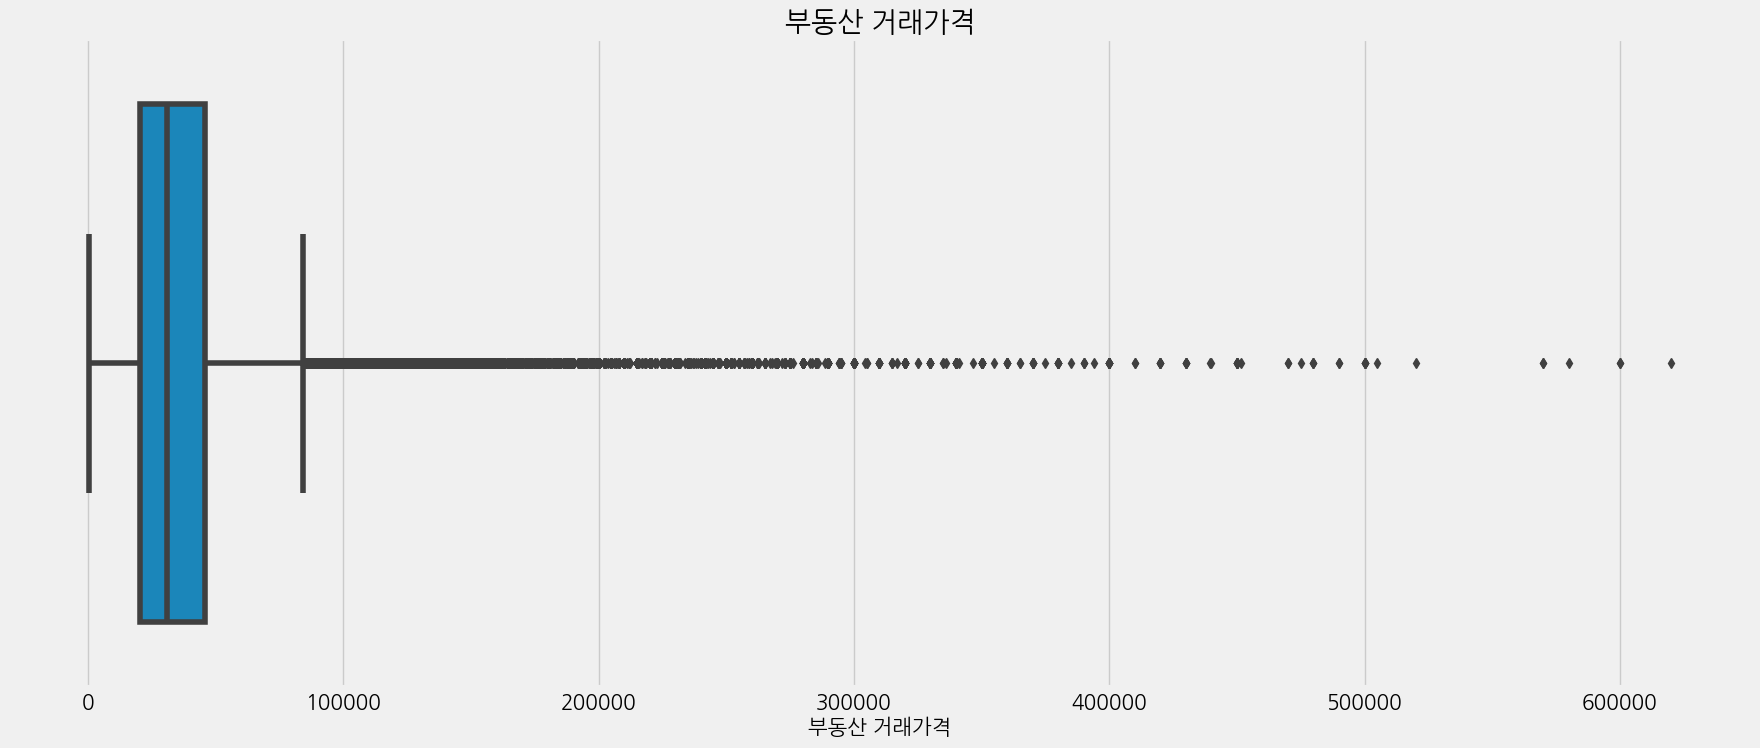

In [ ]:
# seaborn의 boxplot을 통해 부동산 거래가의 이상치를 확인해보기
plt.figure(figsize = (20,8))
sns.boxplot(x = 'JS_Price', data = df)
plt.title('부동산 거래가격', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('부동산 거래가격', size = 15)
plt.show()

### 이변량 boxplot

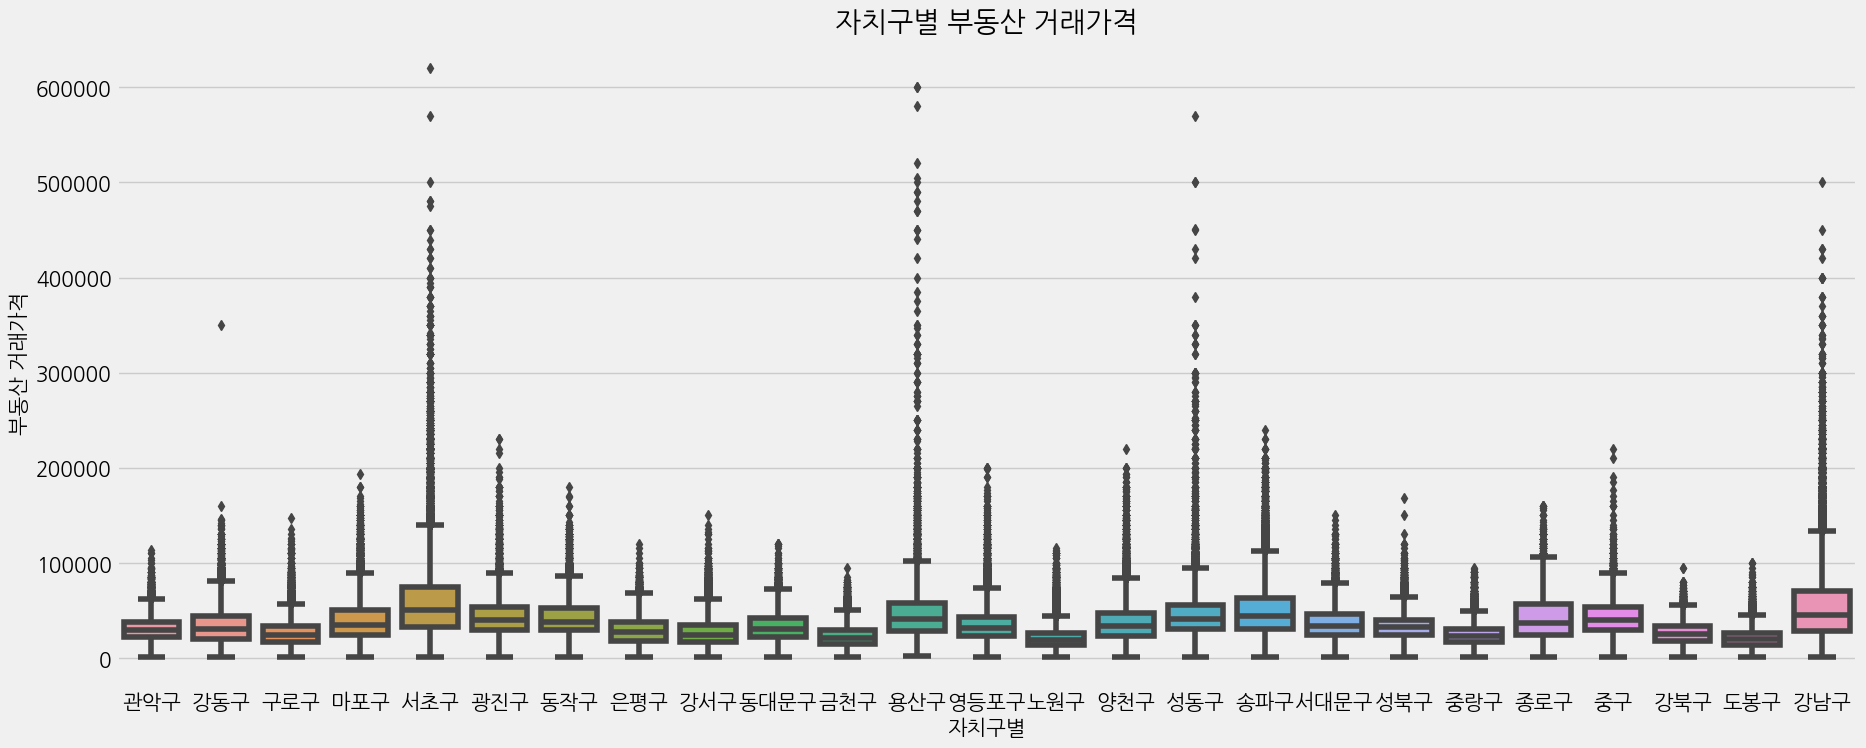

In [ ]:
# seaborn의 boxplot을 통해 자치구별 거래가를 확인해보

plt.subplots(figsize = (20,8))
sns.boxplot(x = 'Region_Name', y = 'JS_Price', data = df)
plt.title('자치구별 부동산 거래가격', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('자치구별', size = 15)
plt.ylabel('부동산 거래가격', size = 15)
plt.show()

## 상관계수

In [ ]:
# 상관계수 값을 cor이라는 객체에 할당하기
cor = df.corr()
cor

<ipython-input-83-58eae1fa601b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


index      Year     Month  Region_Code   KA_Code  \
index            1.000000  0.990733 -0.028204    -0.020888  0.006908   
Year             0.990733  1.000000 -0.052414    -0.020098  0.008732   
Month           -0.028204 -0.052414  1.000000     0.009155 -0.001191   
Region_Code     -0.020888 -0.020098  0.009155     1.000000 -0.331880   
KA_Code          0.006908  0.008732 -0.001191    -0.331880  1.000000   
LNA_Code         0.005723  0.006138  0.009831     0.020725  0.000900   
Main_num         0.019698  0.027941 -0.006408    -0.035763  0.066489   
Sub_num          0.029506  0.029747 -0.002054    -0.043699  0.031149   
Floor            0.024019  0.022913  0.004011     0.008884  0.027717   
Building_Age     0.086977  0.083783 -0.013410     0.073479 -0.114710   
JS_Price         0.303782  0.303462  0.046780     0.192293  0.030170   
JS_BA           -0.143717 -0.148354  0.019725     0.056738  0.038996   
JS_PPA           0.534927  0.537604  0.038042     0.202646  0.020842   
JS_PPP           0.534927  0.537605  0.038042     0.202646  0.020841   
Num_hb           0.006166  0.010660  0.001918    -0.262637  0.109481   
Population      -0.086057 -0.091068  0.008847     0.575893 -0.406327   
IR              -0.483720 -0.522114 -0.102592     0.024580 -0.009240   
UR               0.049186  0.084903 -0.600113    -0.017607  0.003818   
LC_index         0.987381  0.992882  0.013103    -0.018864  0.008453   
CA_index         0.979031  0.988947  0.017777    -0.018804  0.008995   
TC_index         0.988788  0.991199  0.010459    -0.016868  0.007473   
SDT_index       -0.456521 -0.467089  0.148509    -0.001862 -0.003048   
HSP_index        0.905314  0.898621  0.006824    -0.016074  0.005805   
Crime_Rates     -0.342320 -0.344440  0.012275    -0.056779  0.530458   
위도               0.014742  0.010143 -0.009157    -0.634434  0.095790   
경도              -0.026669 -0.034716 -0.008610     0.144177 -0.025414   
Sell_Price_mean  0.368170  0.362203  0.031396     0.265304 -0.005359   

                 LNA_Code  Main_num   Sub_num     Floor  Building_Age  ...  \
index            0.005723  0.019698  0.029506  0.024019      0.086977  ...   
Year             0.006138  0.027941  0.029747  0.022913      0.083783  ...   
Month            0.009831 -0.006408 -0.002054  0.004011     -0.013410  ...   
Region_Code      0.020725 -0.035763 -0.043699  0.008884      0.073479  ...   
KA_Code          0.000900  0.066489  0.031149  0.027717     -0.114710  ...   
LNA_Code         1.000000 -0.031828  0.001230 -0.007170     -0.028557  ...   
Main_num        -0.031828  1.000000 -0.045627  0.042974     -0.157590  ...   
Sub_num          0.001230 -0.045627  1.000000 -0.060504     -0.017774  ...   
Floor           -0.007170  0.042974 -0.060504  1.000000     -0.180390  ...   
Building_Age    -0.028557 -0.157590 -0.017774 -0.180390      1.000000  ...   
JS_Price         0.010791 -0.011008 -0.044049  0.240392     -0.097393  ...   
JS_BA            0.006334 -0.003790 -0.060006  0.133217      0.076756  ...   
JS_PPA           0.007200 -0.012210 -0.008059  0.188598     -0.263537  ...   
JS_PPP           0.007200 -0.012210 -0.008059  0.188598     -0.263537  ...   
Num_hb          -0.006736 -0.009504  0.011124 -0.000355     -0.118455  ...   
Population      -0.009686 -0.064399 -0.063888 -0.031253      0.104963  ...   
IR              -0.016131 -0.005899 -0.034117  0.016842     -0.060729  ...   
UR               0.001387  0.004000  0.011893 -0.013951      0.024725  ...   
LC_index         0.006910  0.026973  0.030932  0.021653      0.077903  ...   
CA_index         0.007441  0.026817  0.029133  0.022531      0.082770  ...   
TC_index         0.005673  0.027976  0.028093  0.025057      0.078634  ...   
SDT_index        0.003725 -0.018418  0.000878 -0.036746     -0.013173  ...   
HSP_index        0.004491  0.023676  0.035039  0.017008      0.041594  ...   
Crime_Rates      0.005013  0.039635  0.013620  0.042169     -0.040536  ...   
위도              -0.038233 -0.069284 -0.010255 -0.0473

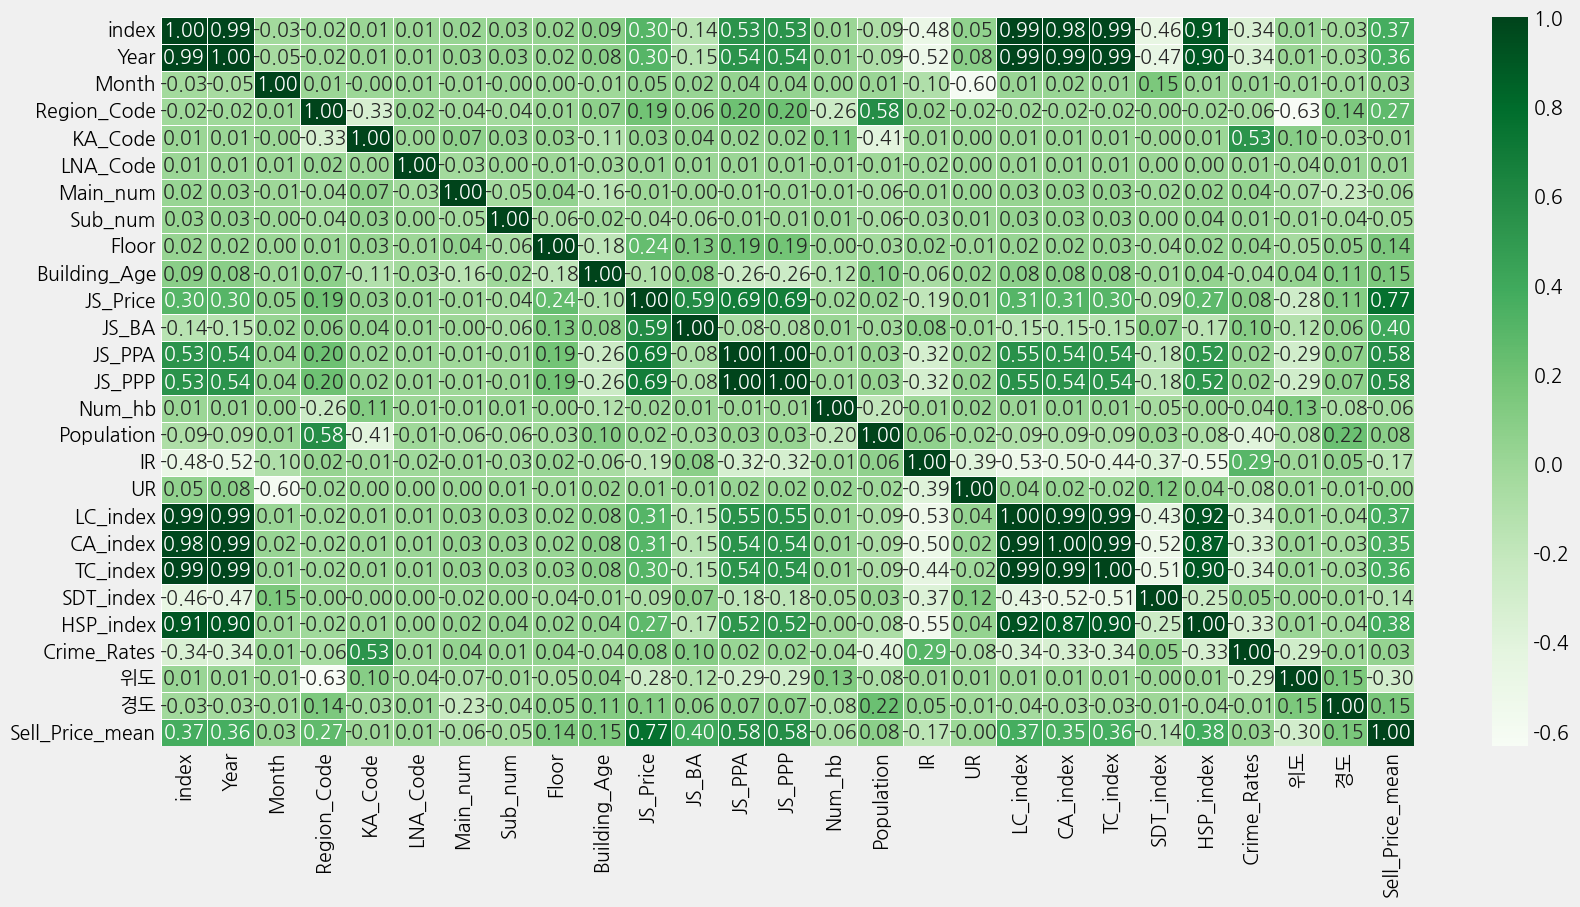

In [ ]:
# heatmap을 사용해 상관관계 테이블을 한눈에 보기 쉬운 형태로 만들기
plt.subplots(figsize=(18, 9))
sns.heatmap(cor, cmap="Greens", annot=True, linewidths=0.5, fmt=".2f", cbar = True)
plt.show()

## scatter plot & lmplot

### 일변량 scatter plot

- JS_Price: 전세가격(건별)
- JS_BA: 임대면적(건별)
- JS_PPA: 임대 면적당 전세가격(건별)
- JS_PPP: 평당 전세가격(건별)

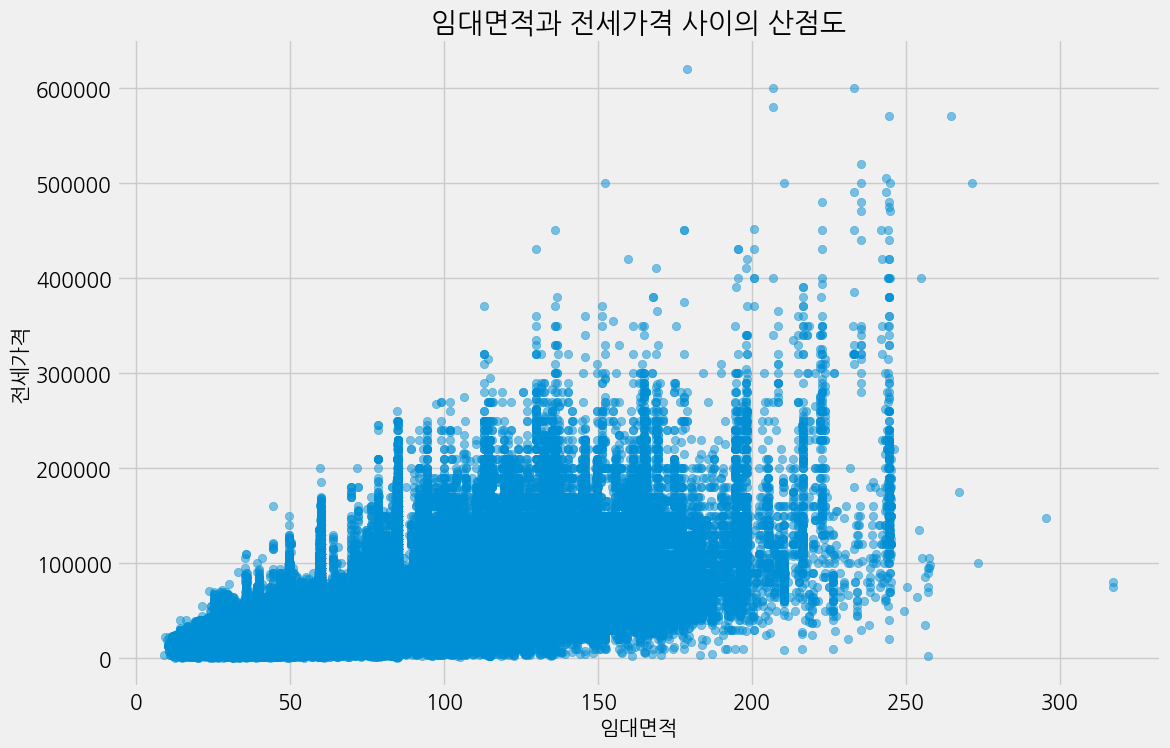

In [ ]:
# matplotlib를 이용해서 임대면적과 전세가격의 산점도를 나타내기

plt.subplots(figsize=(12, 8))
plt.scatter(x = df['JS_BA'], y = df['JS_Price'],  alpha=0.5)
plt.title('임대면적과 전세가격 사이의 산점도', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('임대면적', size = 15)
plt.ylabel('전세가격', size = 15)
plt.show()

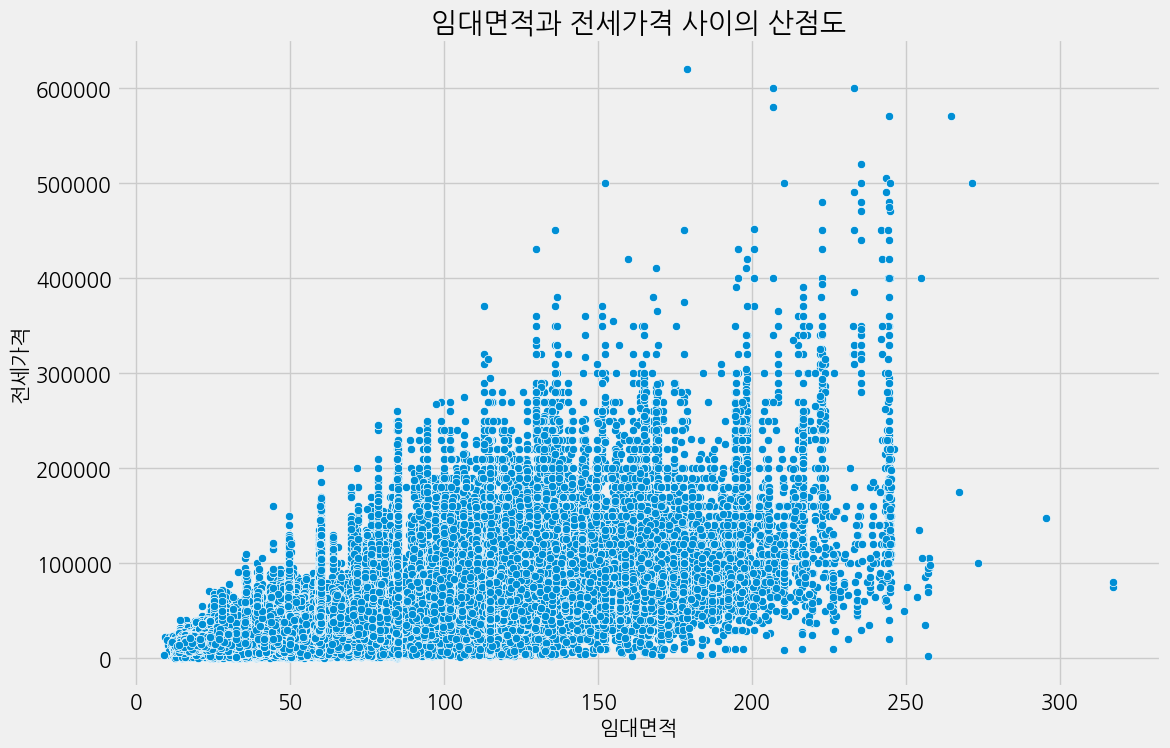

In [ ]:
# seaborn를 이용해서 임대면적과 전세가격의 산점도를 나타내기

plt.subplots(figsize=(12, 8))
sns.scatterplot(x='JS_BA', y='JS_Price', data= df)
plt.title('임대면적과 전세가격 사이의 산점도', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('임대면적', size = 15)
plt.ylabel('전세가격', size = 15)
plt.show()

<Figure size 1200x800 with 0 Axes>

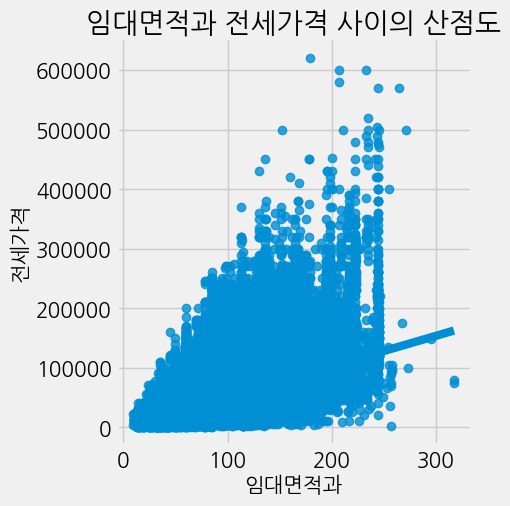

In [ ]:
# seaborn의 lmplot를 이용해서 임대면적과 전세가격의 산점도와 추세선을 나타내기

plt.figure(figsize=(12, 8))
sns.lmplot(x='JS_BA', y='JS_Price',data= df)
plt.title('임대면적과 전세가격 사이의 산점도', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('임대면적과', size = 15)
plt.ylabel('전세가격', size = 15)
plt.show()

### 이변량 scatter plot

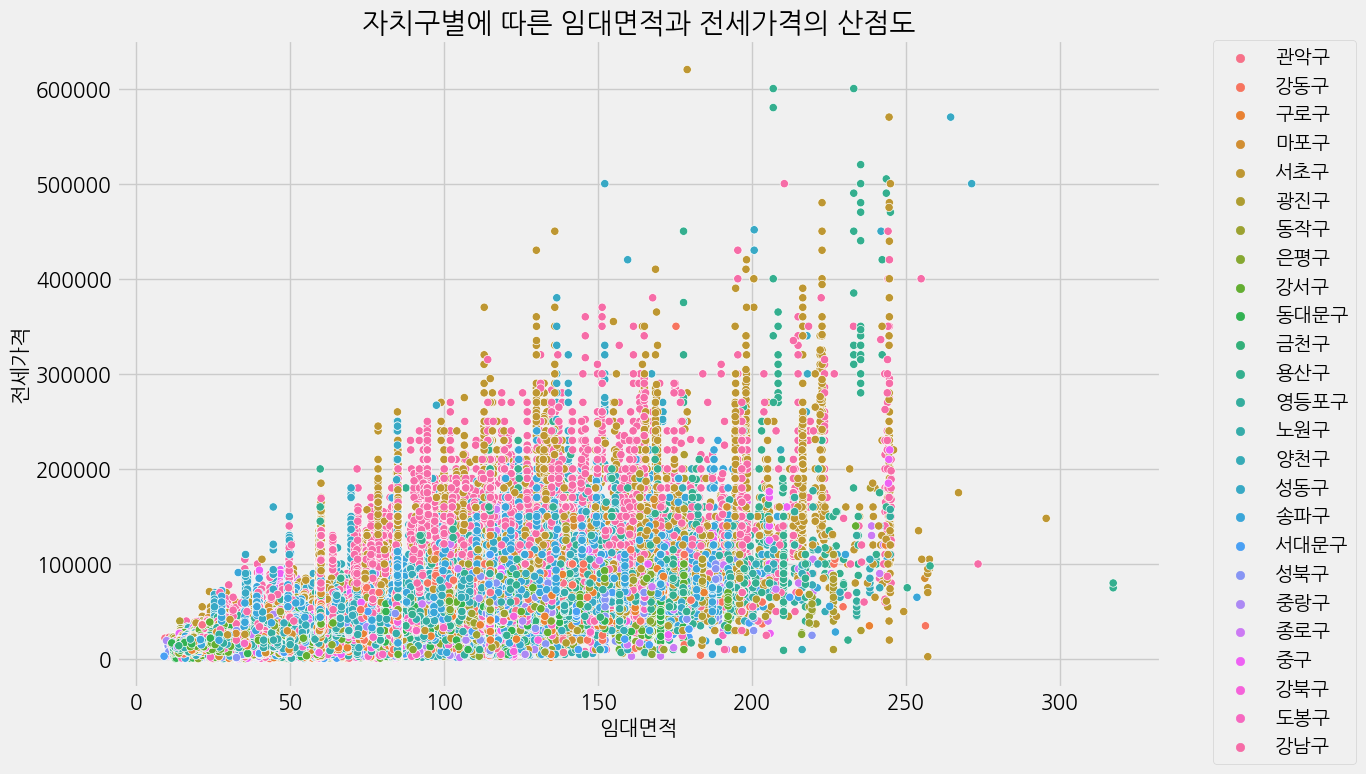

In [ ]:
# seaborn를 이용해서 자치구별 임대면적과 전세가격의 산점도를 나타내기

plt.subplots(figsize=(12, 8))
sns.scatterplot(x='JS_BA', y='JS_Price', hue = 'Region_Name' ,data= df)
plt.title('자치구별에 따른 임대면적과 전세가격의 산점도', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('임대면적', size = 15)
plt.ylabel('전세가격', size = 15)
plt.show()

## lmplot

<Figure size 1200x800 with 0 Axes>

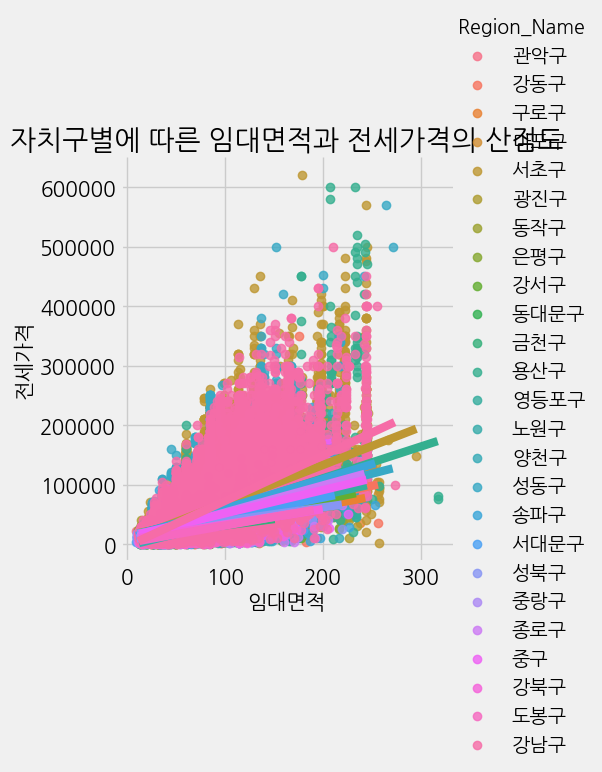

In [ ]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='JS_BA', y='JS_Price', hue='Region_Name' ,data= df)
plt.title('자치구별에 따른 임대면적과 전세가격의 산점도', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('임대면적', size = 15)
plt.ylabel('전세가격', size = 15)
plt.show()

## line plot

In [ ]:
# 전용면적당 아파트 거래가 변수를 만들어보기
df['price_per_area'] = df['JS_Price'] /  df['JS_BA']

In [ ]:
price_per_area_by_year = df.groupby(['Year'])[['price_per_area']].mean()
price_per_area_by_year

price_per_area
Year                
2011      314.648700
2012      335.075284
2013      358.006237
2014      396.492721
2015      439.888317
2016      493.784500
2017      536.144506
2018      557.111557
2019      595.403711
2020      648.656291
2021      737.529063
2022      775.800252
2023      705.423223

### 일변량 line plot

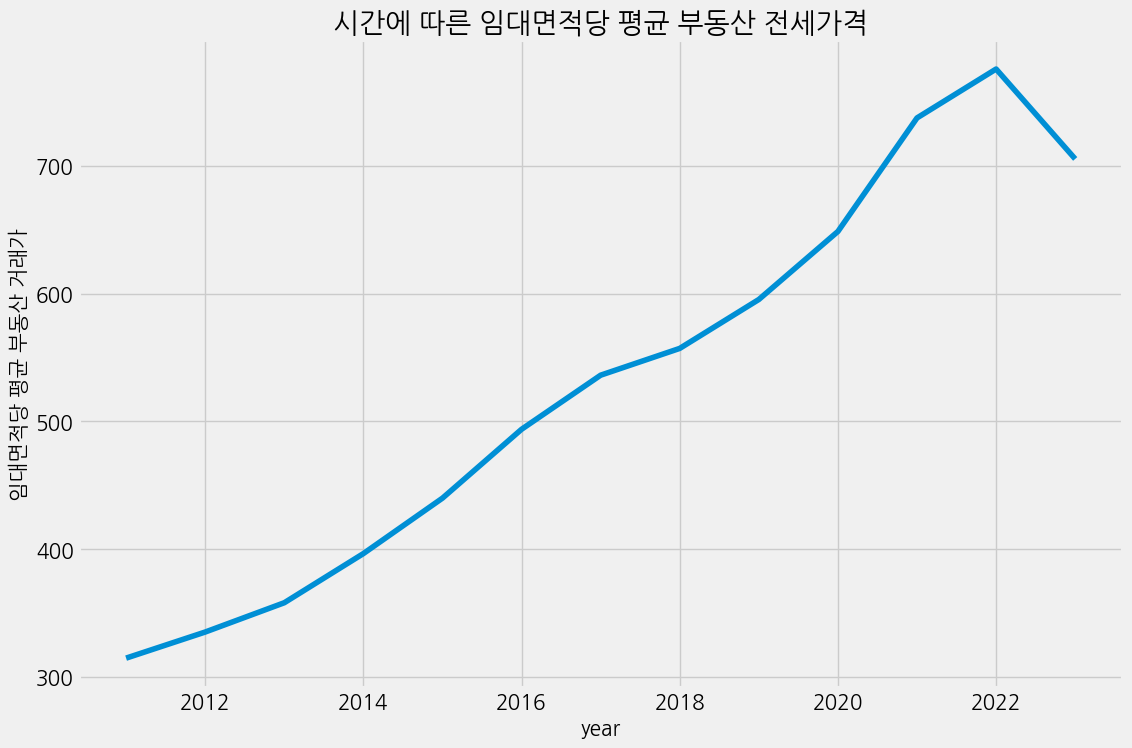

In [ ]:
# matplotlib의 line plot을 이용해서 임대면적당 전세가격의 추이를 시각화해보기

plt.subplots(figsize=(12, 8))
plt.plot(price_per_area_by_year.index, price_per_area_by_year['price_per_area'])
plt.title('시간에 따른 임대면적당 평균 부동산 전세가격', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('year', size = 15)
plt.ylabel('임대면적당 평균 부동산 거래가', size = 15)
plt.show()

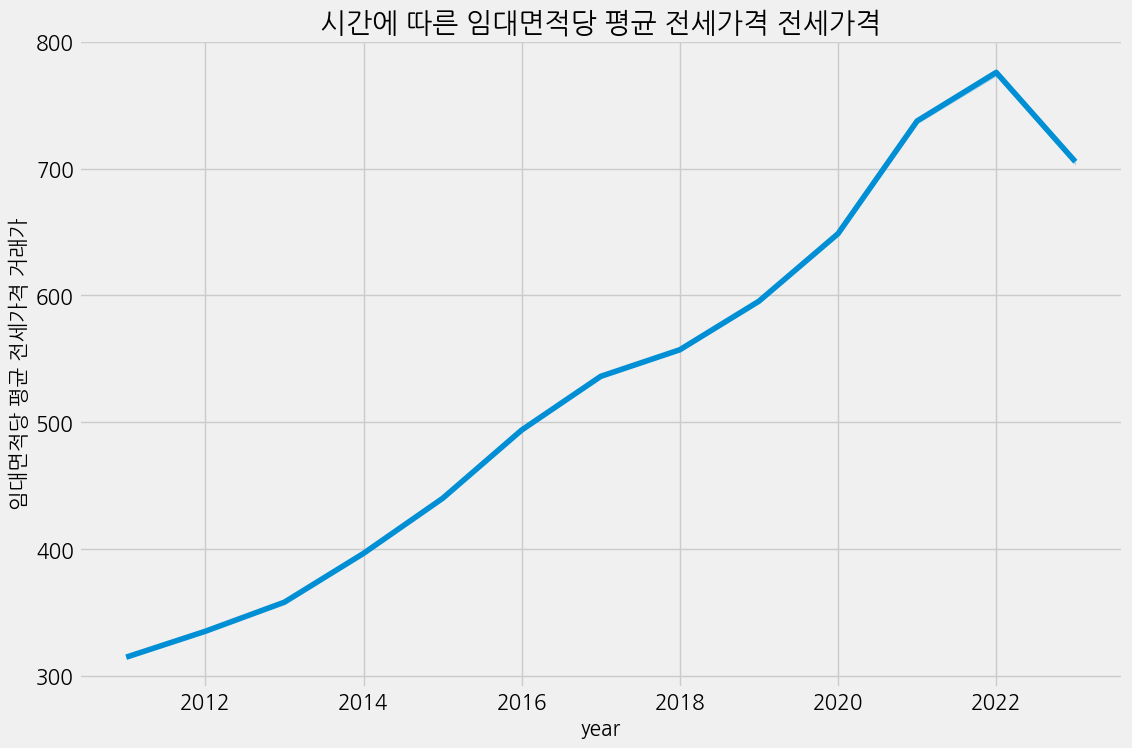

In [ ]:
# seaborn의 line plot을 이용해서 임대면적당 전세가격의 추이를 시각화해보기

plt.subplots(figsize=(12, 8))
sns.lineplot(x='Year', y='price_per_area', data=df)
plt.title('시간에 따른 임대면적당 평균 전세가격 전세가격', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('year', size = 15)
plt.ylabel('임대면적당 평균 전세가격 거래가', size = 15)
plt.show()

### 이변량 line plot

In [ ]:
# seaborn을 이용해서 자치구별 임대면적당 전세가격 line plot를 그려보기

plt.subplots(figsize=(12, 8))
sns.lineplot(x='Year', y='price_per_area', hue ='Region_Name' ,data=df)
plt.title('시간에 따른 자치구별 임대면적당 평균 부동산 전세가격', size = 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('year', size = 15)
plt.ylabel('자치구별 임대면적당 평균 부동산 거래가', size = 15)
plt.show()

## 지도시각화

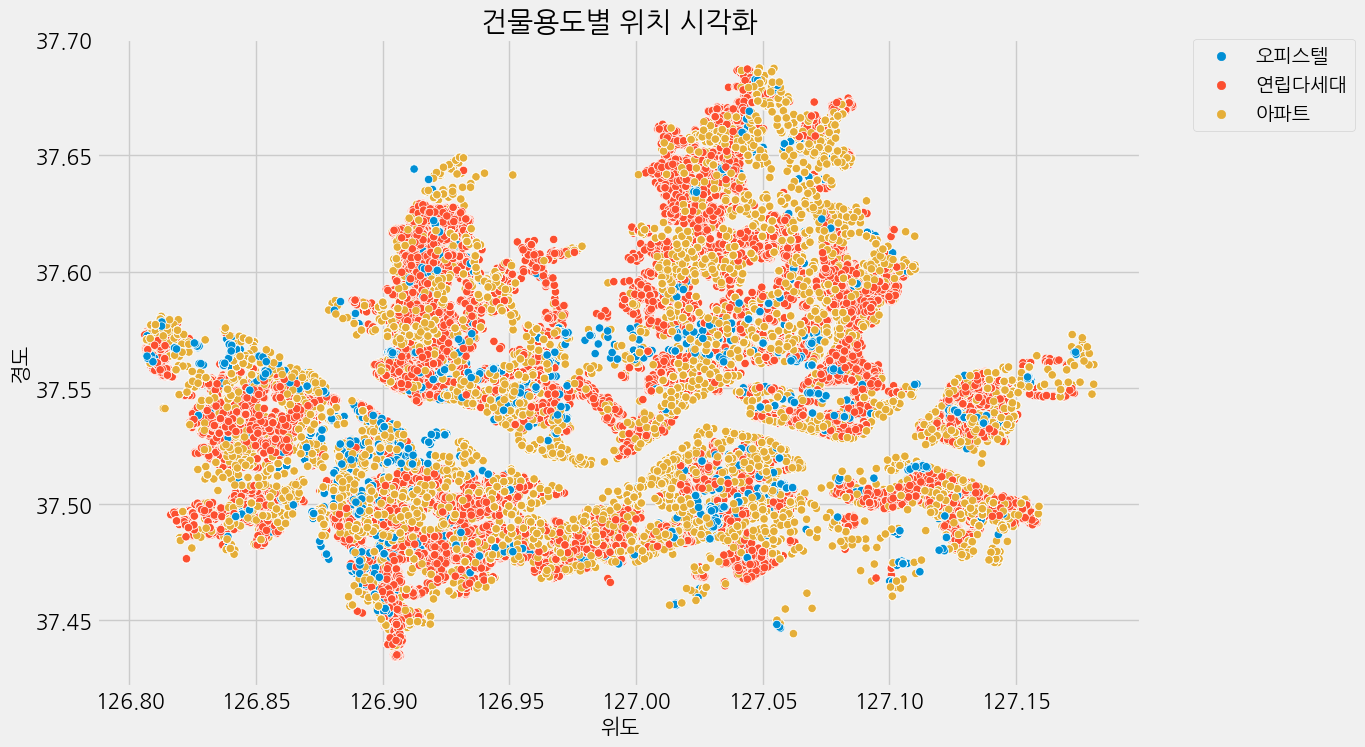

In [ ]:
plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x="경도", y="위도", hue="Building_Use")
plt.title('건물용도별 위치 시각화', size = 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('위도', size = 15)
plt.ylabel('경도', size = 15)
plt.show()